In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
session = 798911424

#### We define some auxilliary functions:

In [3]:
def compute_unit_variance(dataset, unit, frequency):
    """
    Compute the variance of spikes per second for a specific unit in the dataset.

    Parameters:
    dataset (pd.DataFrame): The dataset containing information about units, orientations, frequencies, and spikes per second.
    unit (int): The unit ID for which the variance is to be computed.
    frequency (str): The column name representing the frequency (e.g., 'temporal_frequency').

    Returns:
    float: The variance of spikes per second for the specified unit.
    """
    filtered_dataset = dataset.loc[dataset['unit_id'] == unit]
    variance = filtered_dataset.groupby(['orientation', frequency]).mean(numeric_only=True).reset_index().drop(columns=['stimulus_presentation_id'])['spikes_per_second'].std()**2
    return variance

def compute_dataset_variance(dataset, frequency):
    """
    Compute the variance of spikes per second for all units in the dataset.

    Parameters:
    dataset (pd.DataFrame): The dataset containing information about units, orientations, frequencies, and spikes per second.
    frequency (str): The column name representing the frequency (e.g., 'temporal_frequency').

    Returns:
    dict: A dictionary where the keys are unit IDs and the values are the variances of spikes per second for the corresponding units.
    """
    units = dataset['unit_id'].unique()
    variances = {}
    for unit in units:
        variance = compute_unit_variance(dataset, unit, frequency)
        variances[unit] = variance
    return variances

def histogram_variances(variances):
    """
    Plot a histogram of variances for units.

    Parameters:
    variances (dict): A dictionary where keys are unit IDs and values are the variances of spikes per second.

    Returns:
    None: Displays a histogram plot of the variances.
    """
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.histplot(list(variances.values()), bins=30, ax=ax)
    ax.set_xlabel('Variance')
    ax.set_ylabel('Count')
    ax.set_title('Histogram of Variances for Units')
    plt.show()

def top_variances(variances, percentage=0.1):
    """
    Extract the top percentage of units with the highest variances.

    Parameters:
    variances (dict): A dictionary where keys are unit IDs and values are their variances.
    percentage (float): The percentage of top variances to extract (default is 0.1, i.e., top 10%).

    Returns:
    dict: A dictionary containing the top percentage of units with the highest variances.
          Keys are unit IDs, and values are their variances.
    """
    sorted_variances = sorted(variances.items(), key=lambda x: x[1], reverse=True)
    top_percent = sorted_variances[:int(len(sorted_variances) * percentage)]
    return dict(top_percent)

def get_unit_area(dataset, unit_id):
    """
    Retrieve the brain area associated with a specific unit.

    Parameters:
    dataset (pd.DataFrame): The dataset containing information about units and their associated areas.
    unit_id (int): The unit ID for which the brain area is to be retrieved.

    Returns:
    str or None: The brain area associated with the unit, or None if the unit is not found in the dataset.
    """
    unit = dataset.loc[dataset['unit_id'] == unit_id]
    if unit.empty:
        return None
    else:
        return unit.iloc[0]['area']

def get_area_frequency(dataset, unit_list):
    """
    Compute the frequency of units in each brain area.

    Parameters:
    dataset (pd.DataFrame): The dataset containing information about units and their associated areas.
    unit_list (iterable): A list or iterable of unit IDs for which the brain area frequencies are to be computed.

    Returns:
    dict: A dictionary where keys are brain areas and values are the count of units in each area.
    """
    areas = {}
    for unit_id in unit_list:
        area = get_unit_area(dataset, unit_id)
        if area is not None:
            if areas.get(area) is None:
                areas[area] = 0
            areas[area] += 1
    return areas

def plot_unit_spikes_per_second(dataset, unit, frequency):
    """
    Plot the spikes per second for a specific unit in the dataset.

    Parameters:
    dataset (pd.DataFrame): The dataset containing information about units, orientations, frequencies, and spikes per second.
    unit (int): The unit ID for which the spikes per second are to be plotted.
    frequency (str): The column name representing the frequency (e.g., 'temporal_frequency').

    Returns:
    None: Displays a scatter plot of spikes per second for the specified unit.
    """
    filtered_dataset = dataset.loc[dataset['unit_id'] == unit]
    spikes_dataset = filtered_dataset.groupby(['orientation', frequency]).mean(numeric_only=True).reset_index().drop(columns=['stimulus_presentation_id'])

    plt.figure(figsize=(10, 5))
    sns.scatterplot(x=spikes_dataset[frequency], y=spikes_dataset['orientation'], hue=spikes_dataset['spikes_per_second'], palette='Reds', size=spikes_dataset['spikes_per_second'], sizes=(20, 200))
    plt.title(f'Spikes per second for unit {unit} in area {get_unit_area(dataset, unit)}')
    plt.legend(bbox_to_anchor=(1.01, 1), title='Spikes per second', loc='upper left')
    plt.show()

## Drifting gratings

In [ ]:
raw_dataset = pd.read_parquet(f'ourdata/drifting_dataset_session_{session}.parquet')
raw_dataset

,stimulus_presentation_id,unit_id,orientation,temporal_frequency,spikes_per_second,area
0,3798,951088664,0.0,15.0,12.489571,APN
1,3798,951088679,0.0,15.0,11.989988,APN
2,3798,951088721,0.0,15.0,12.489571,APN
3,3798,951088823,0.0,15.0,0.999166,APN
4,3798,951088862,0.0,15.0,38.967462,APN
...,...,...,...,...,...,...
396805,49432,951117127,180.0,1.0,11.490348,VISrl
396806,49432,951117252,180.0,1.0,10.990768,LP
396807,49432,951117258,180.0,1.0,2.997482,LP
396808,49432,951117264,180.0,1.0,10.491187,LP


In [ ]:
analysed_dataset = pd.read_parquet(f'ourdata/analysed_drifting_dataset_session_{session}.parquet')
analysed_dataset

,stimulus_presentation_id,area,temporal_frequency,orientation,active
0,3798,APN,15.0,0.0,1
1,3798,CA1,15.0,0.0,1
2,3798,CA2,15.0,0.0,1
3,3798,CA3,15.0,0.0,0
4,3798,DG,15.0,0.0,1
...,...,...,...,...,...
10795,49432,VISal,1.0,180.0,1
10796,49432,VISam,1.0,180.0,1
10797,49432,VISl,1.0,180.0,0
10798,49432,VISp,1.0,180.0,1


In [ ]:
# we compute the variance of the spikes per second for each unit
variances_drifting_units = compute_dataset_variance(raw_dataset, 'temporal_frequency')

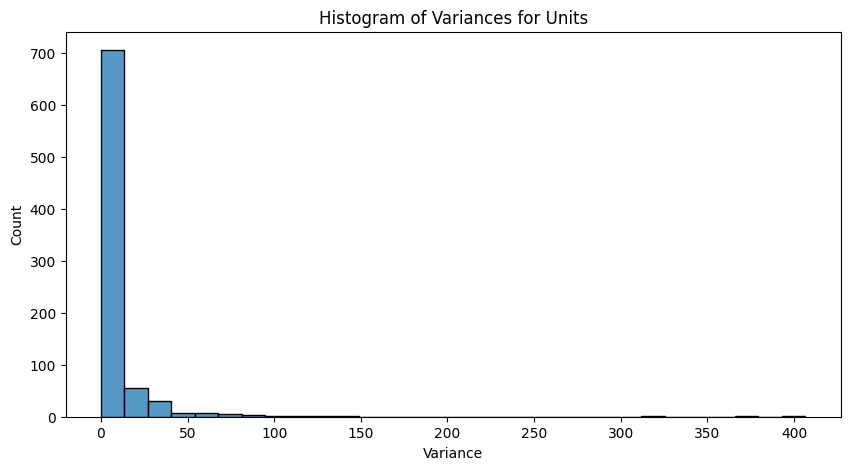

In [ ]:
# we plot the histogram of the variances to see how they are distributed
histogram_variances(variances_drifting_units)

we see that most of the units have low variance. we are only interested in the units which have a higher variance so we keep only those:

In [ ]:
# top 5% units with most variance
top_5_percent_variances = top_variances(variances_drifting_units, 0.05)

In [ ]:
# we not create a dictionary with the areas of the top 5% units and their frequency
areas = get_area_frequency(raw_dataset, top_5_percent_variances.keys())
areas

{'VISal': 7,
 'MB': 1,
 'NOT': 4,
 'VISl': 5,
 'VISp': 8,
 'LGv': 6,
 'SUB': 1,
 'VISam': 7,
 'VISrl': 2}

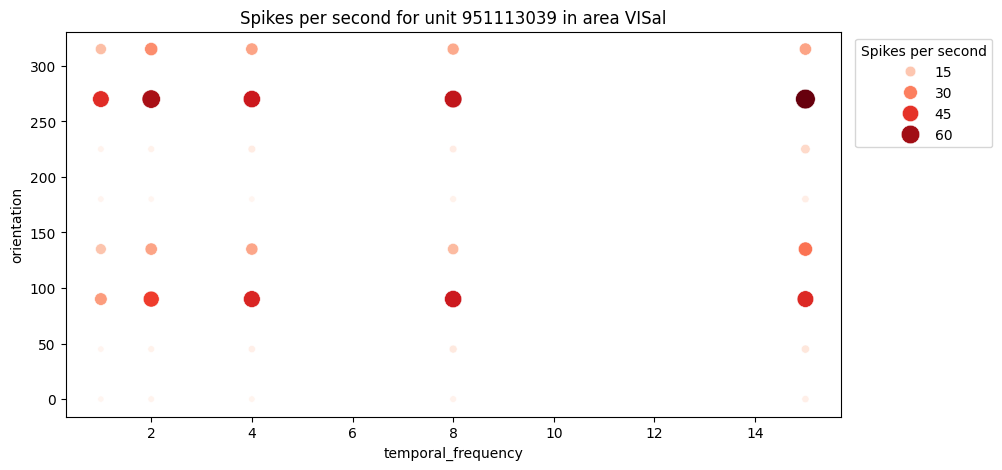

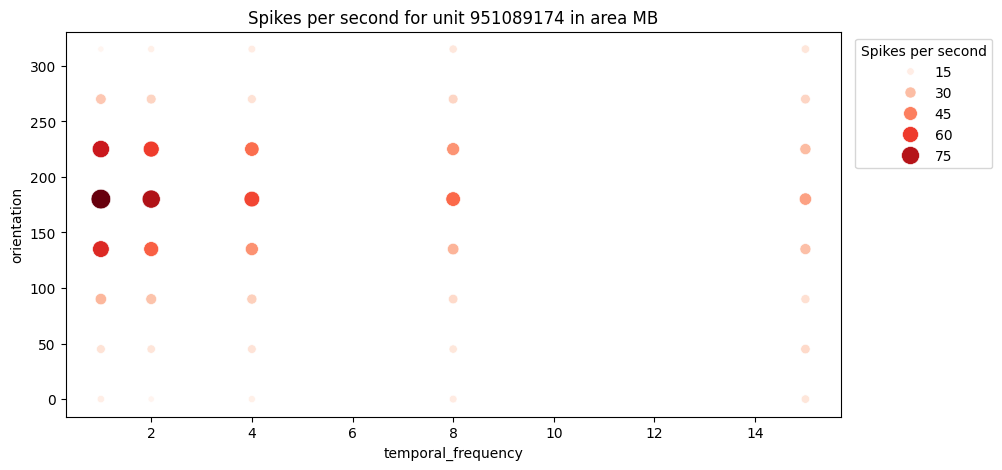

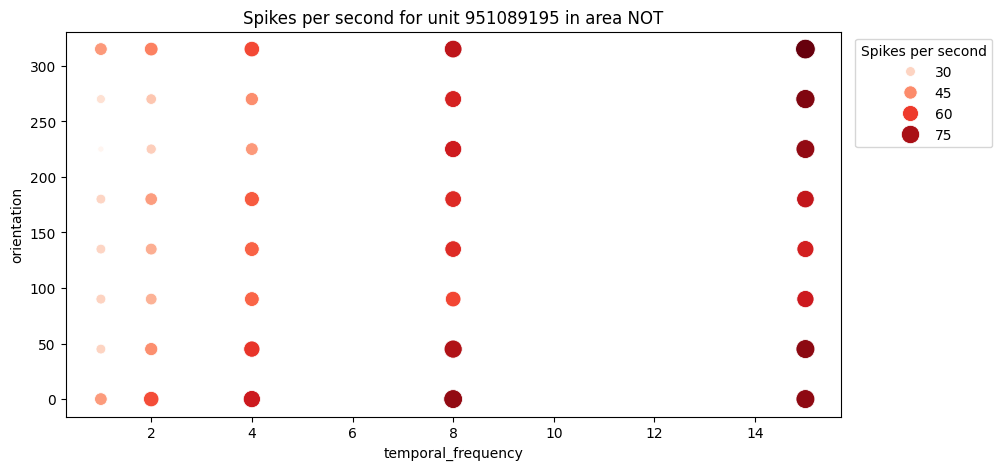

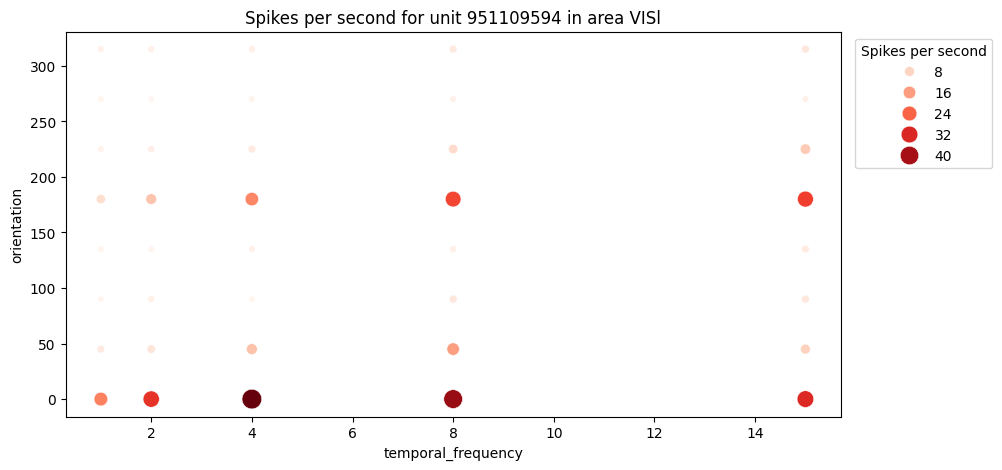

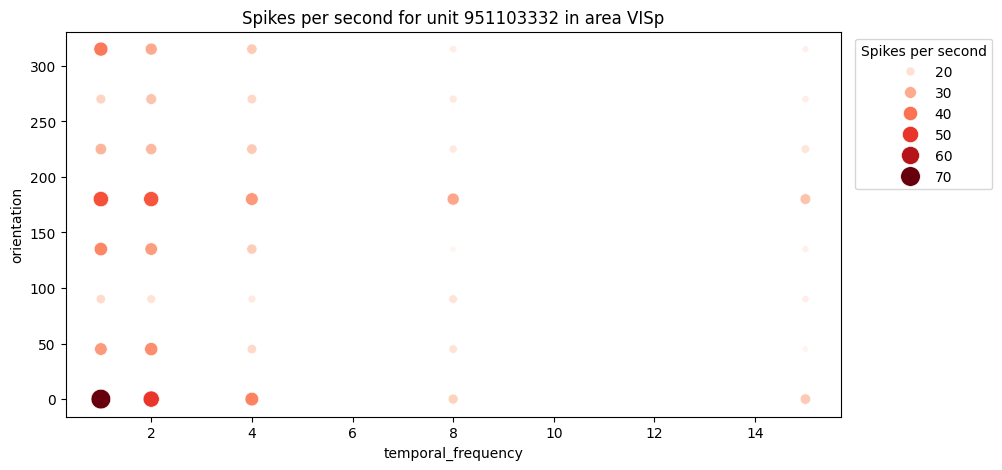

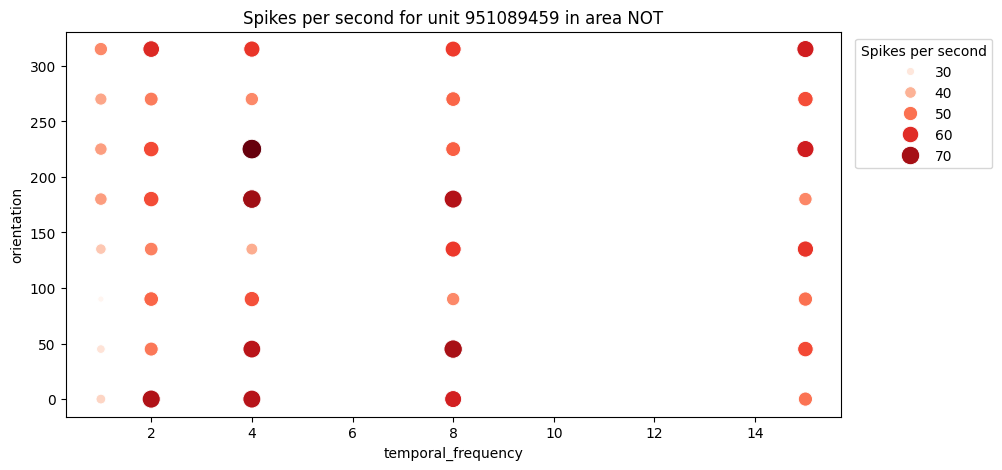

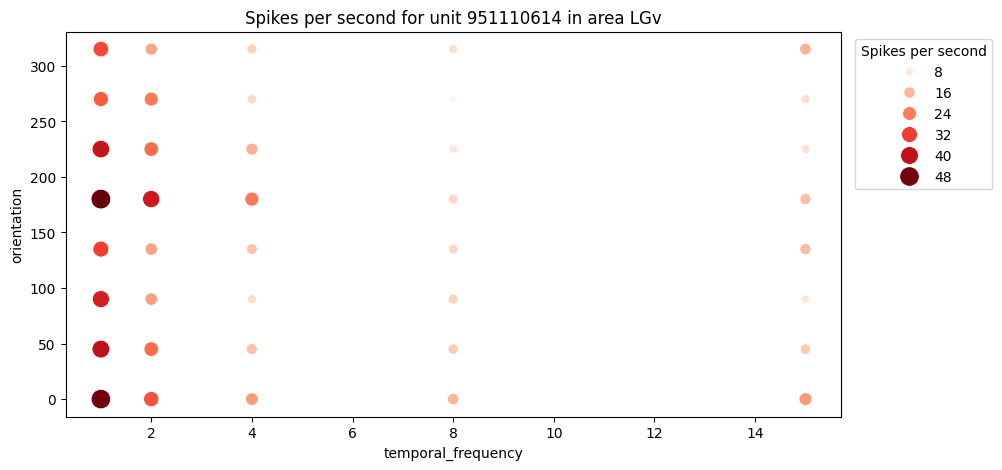

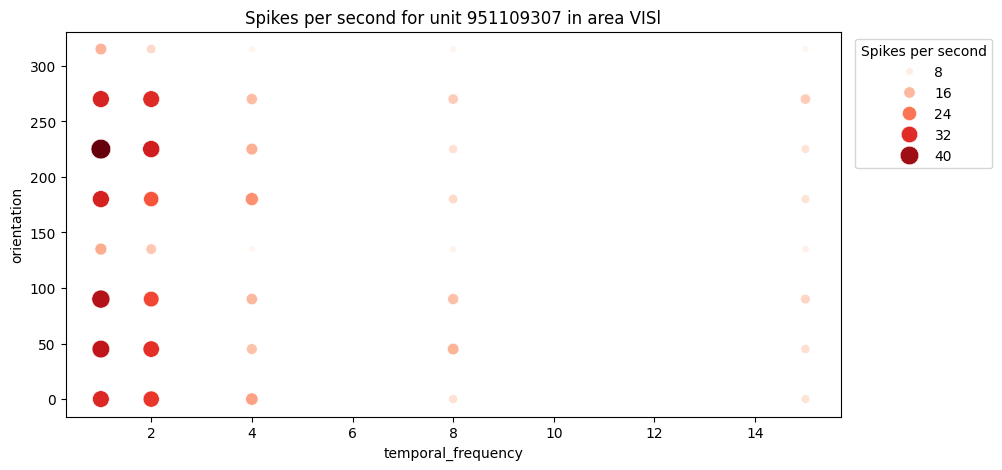

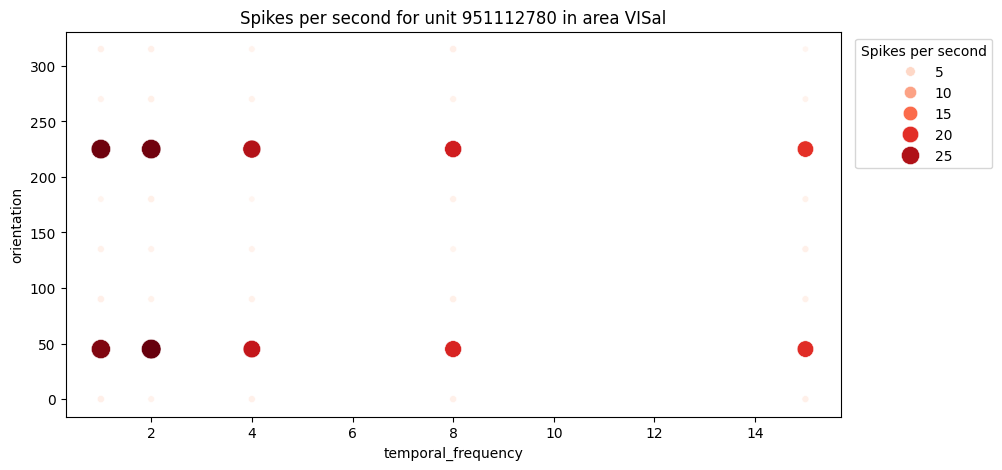

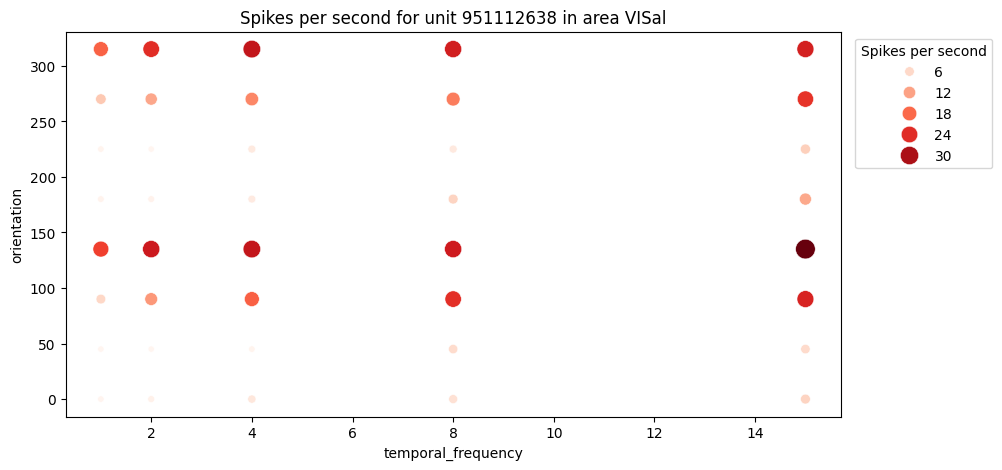

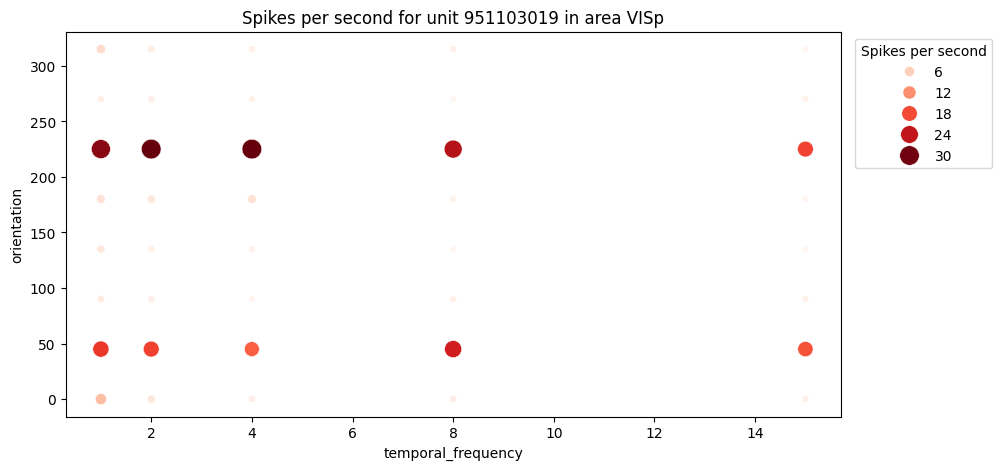

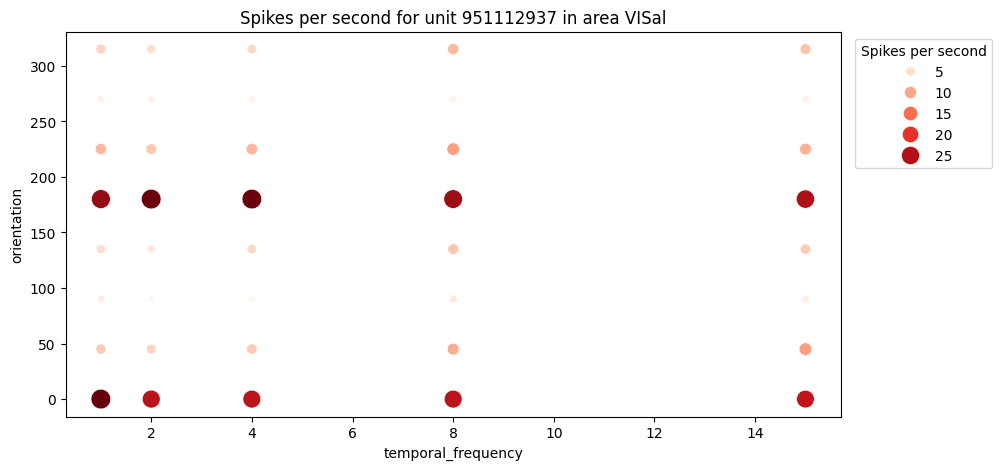

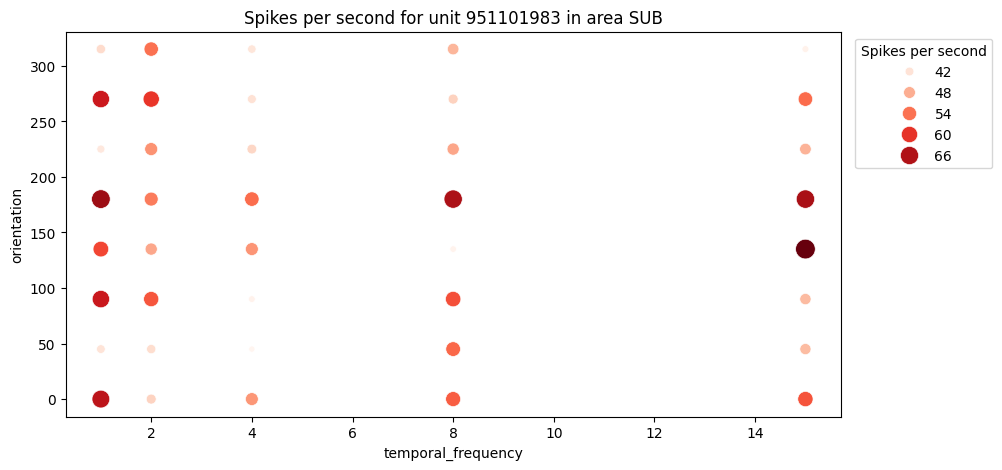

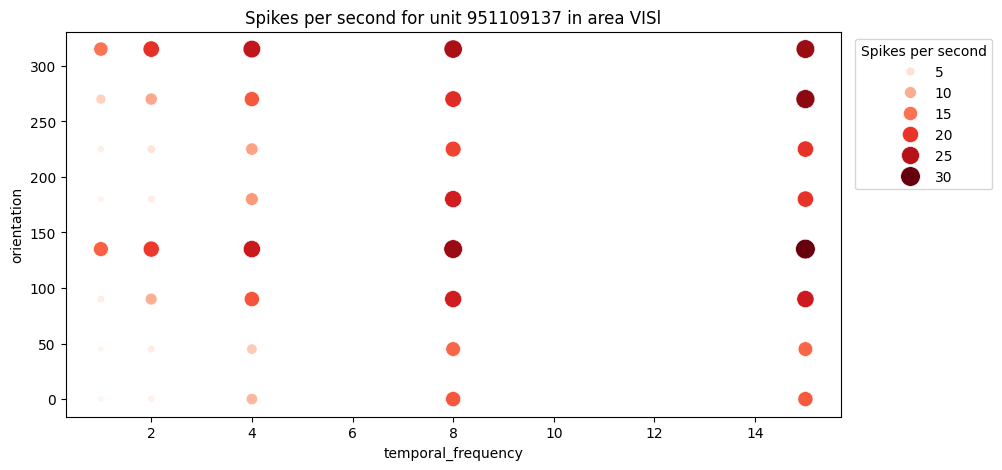

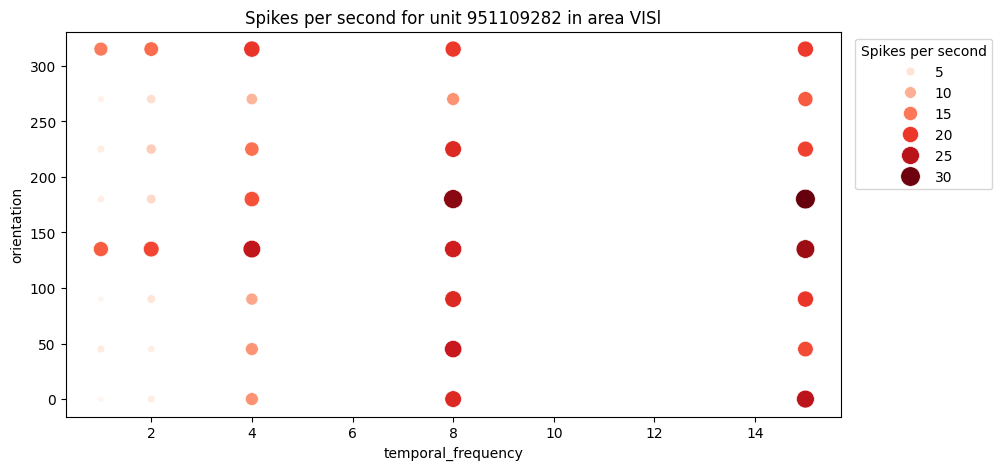

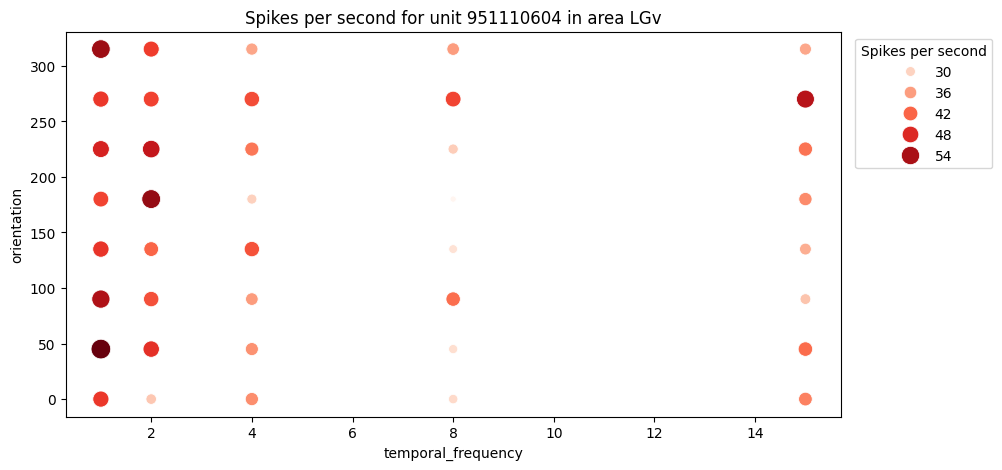

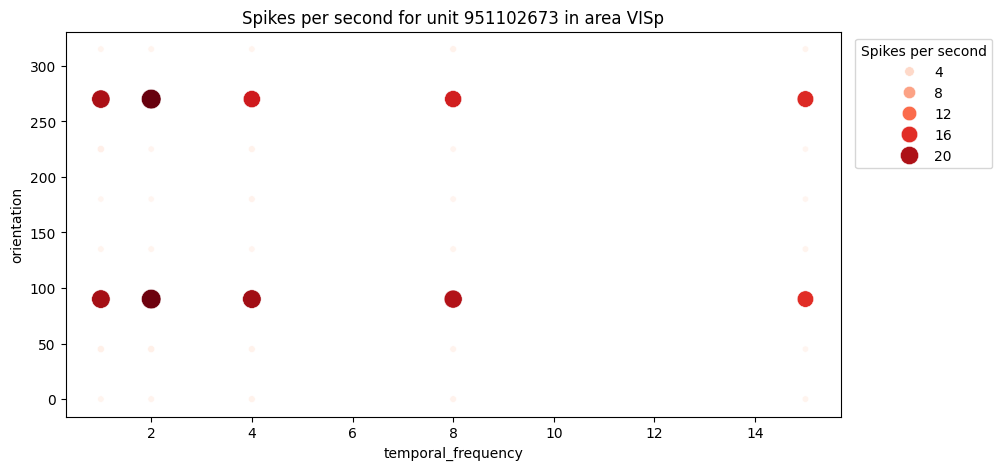

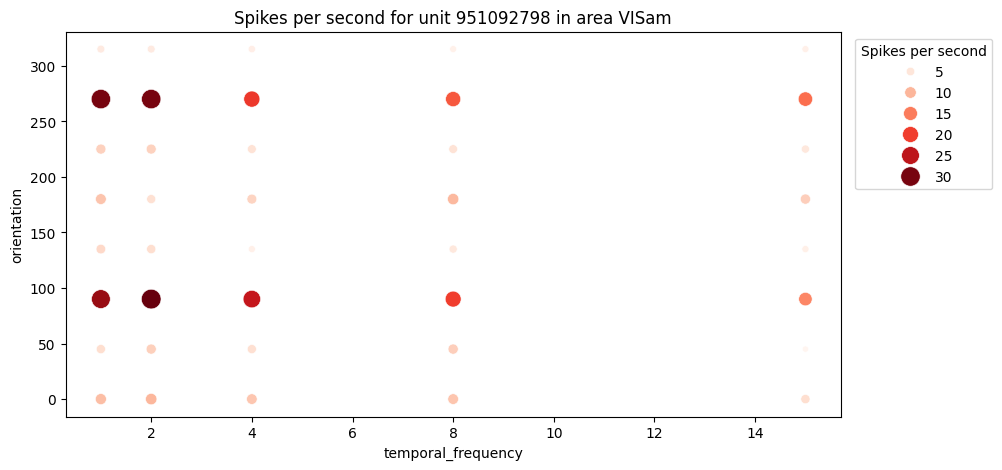

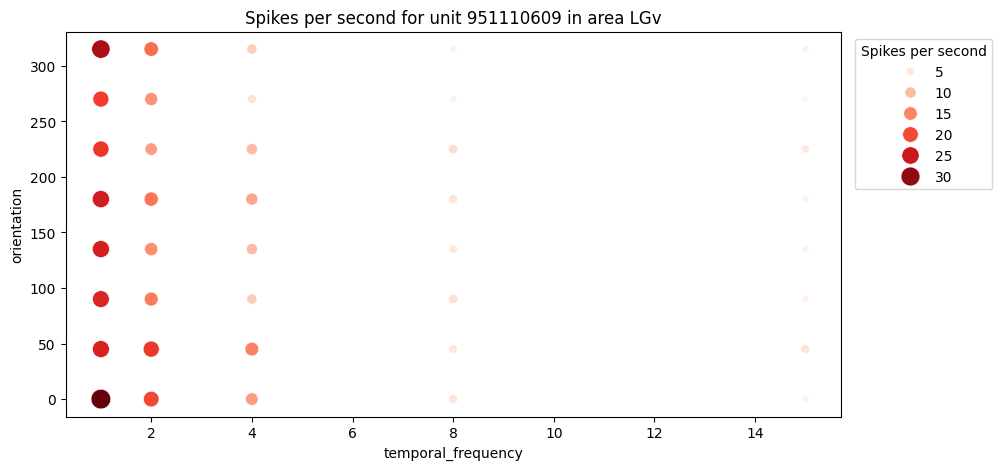

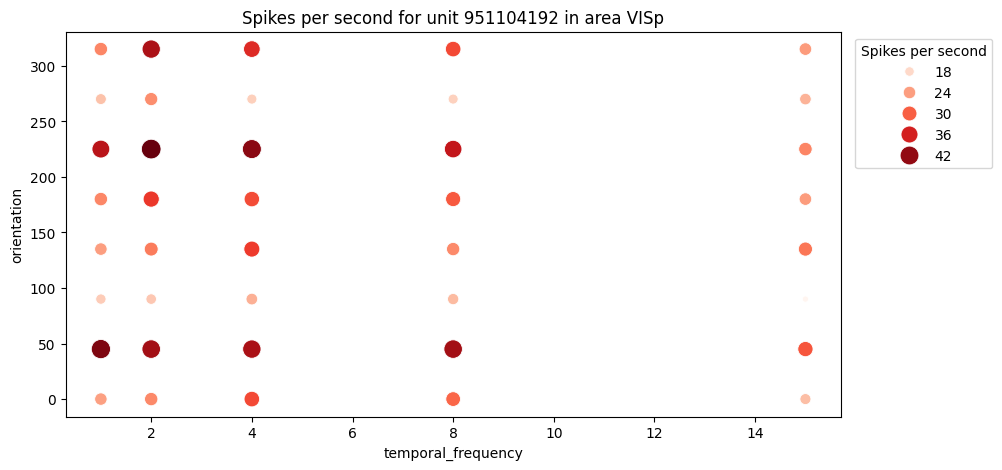

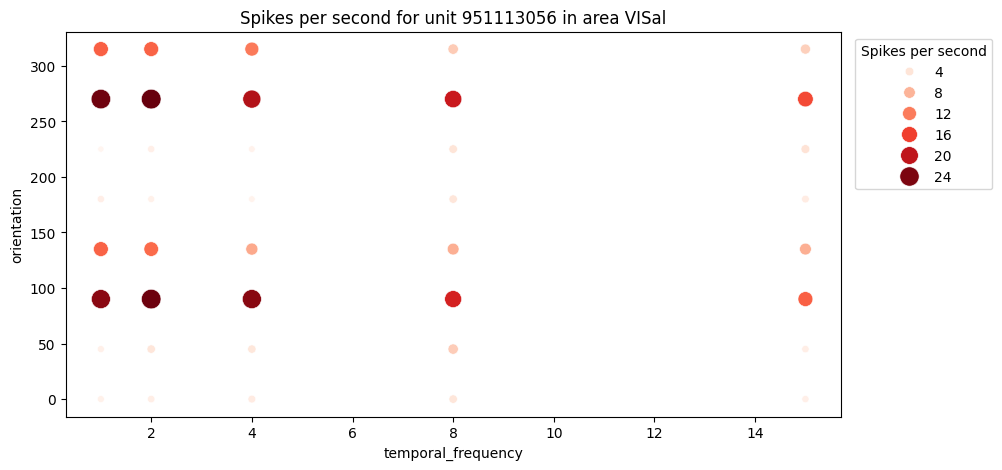

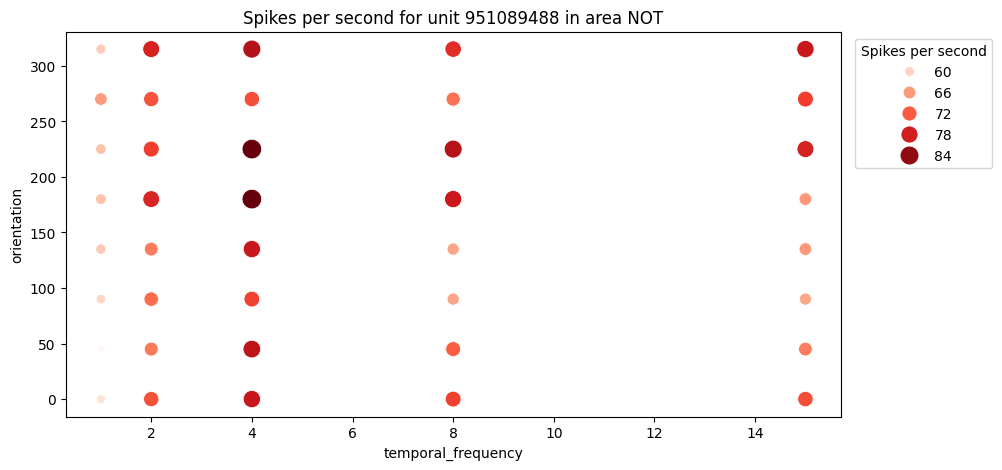

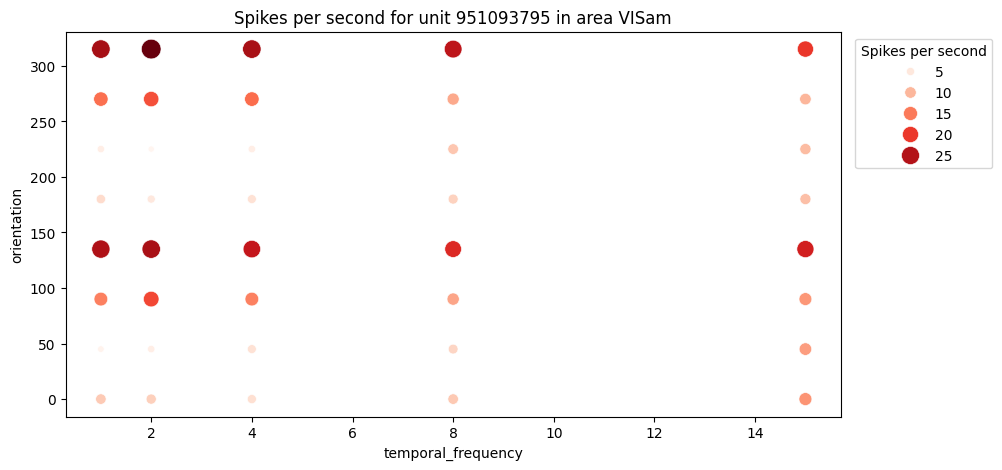

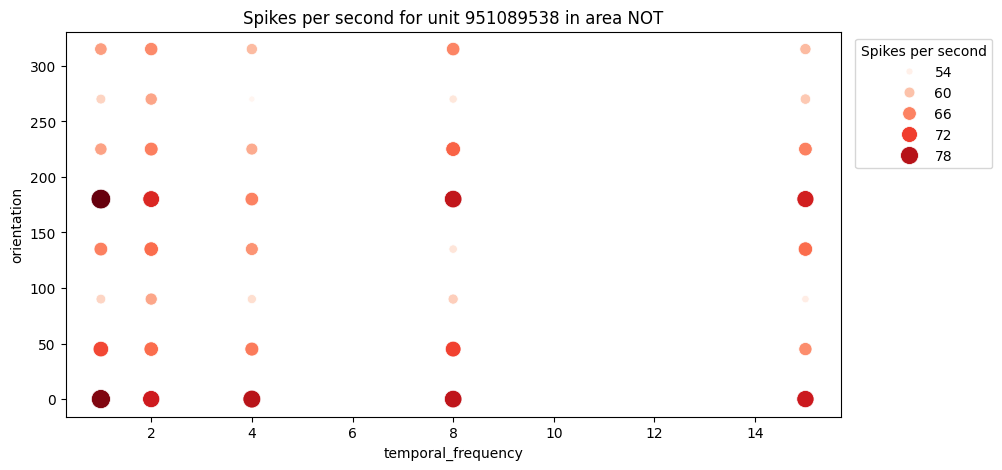

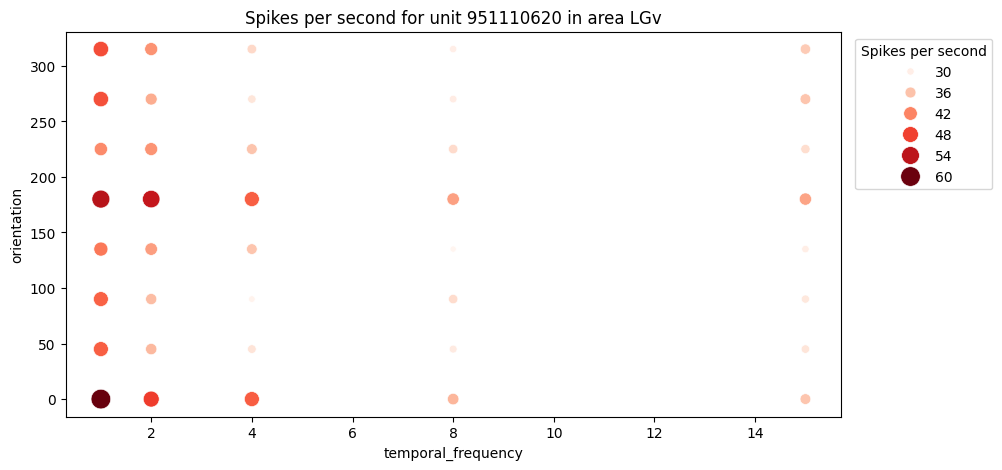

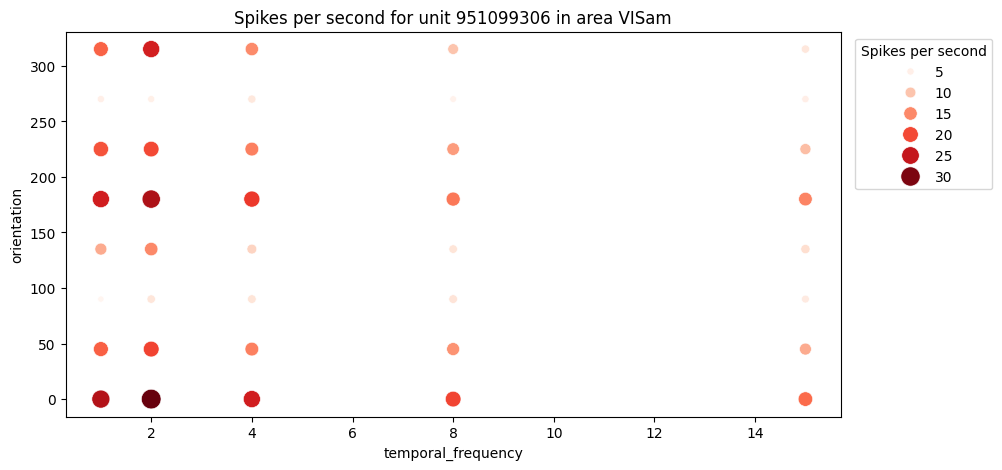

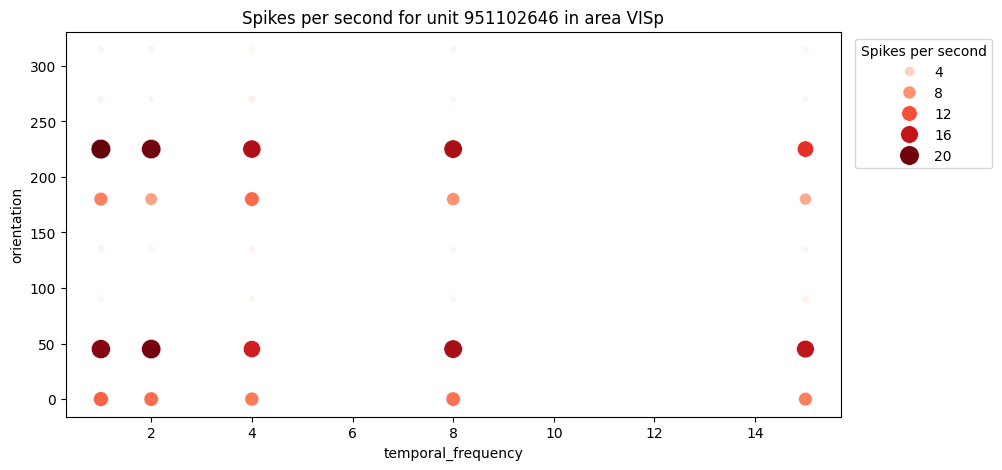

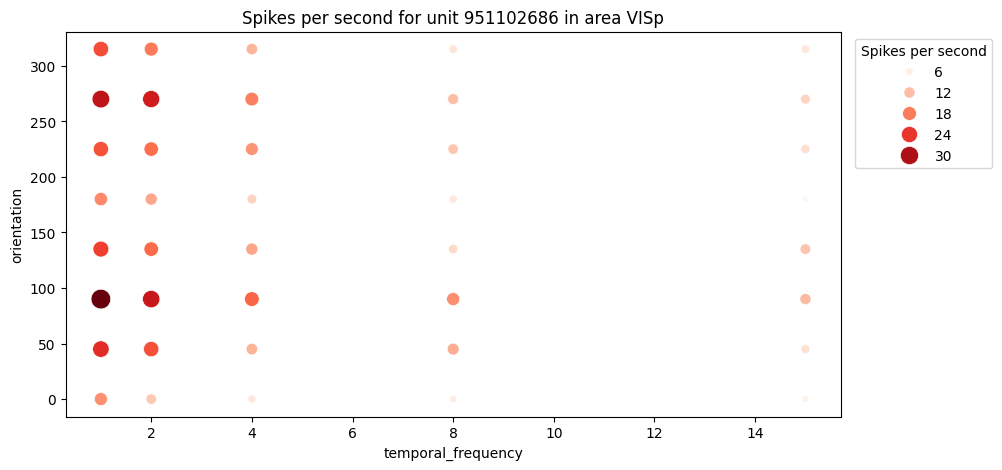

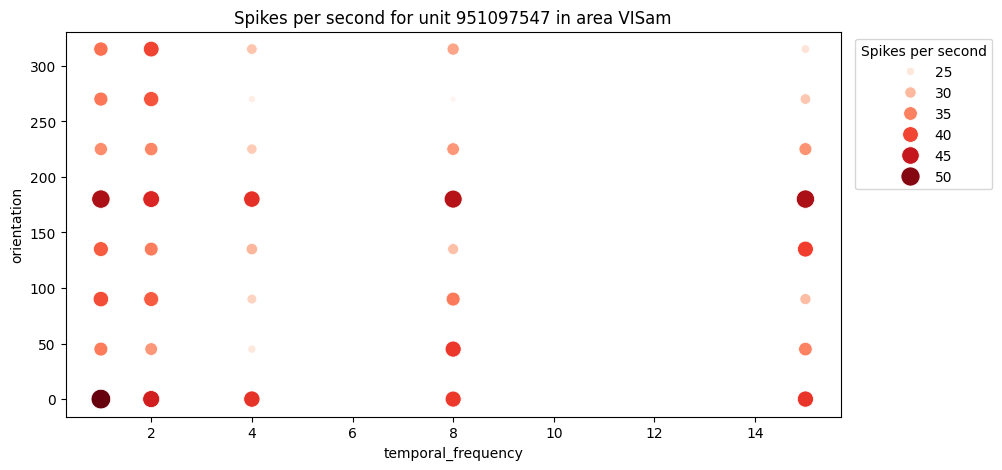

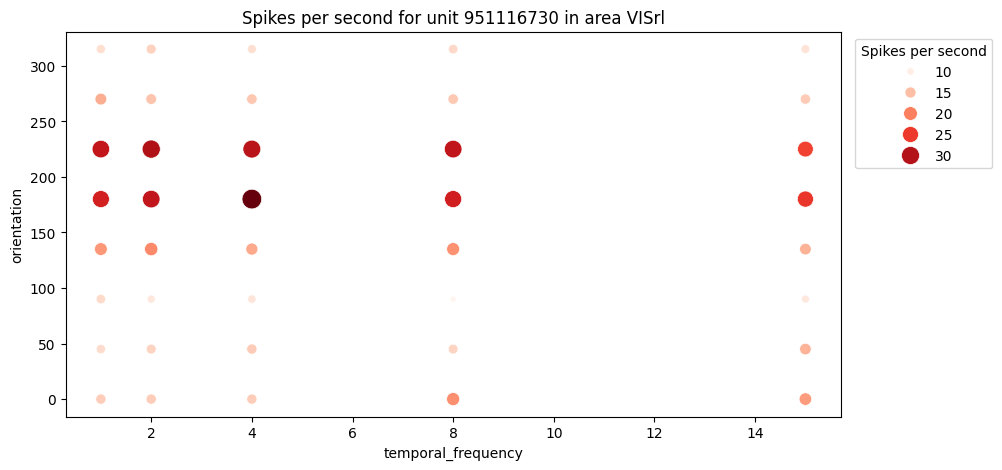

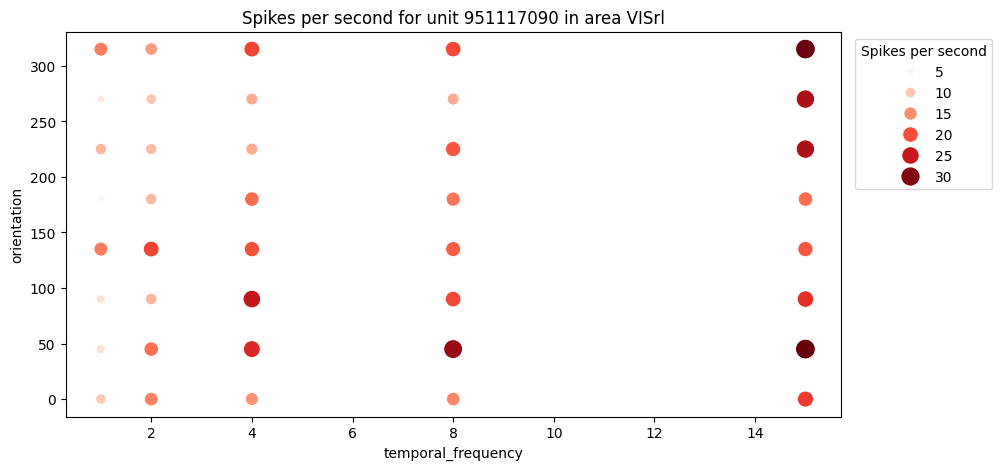

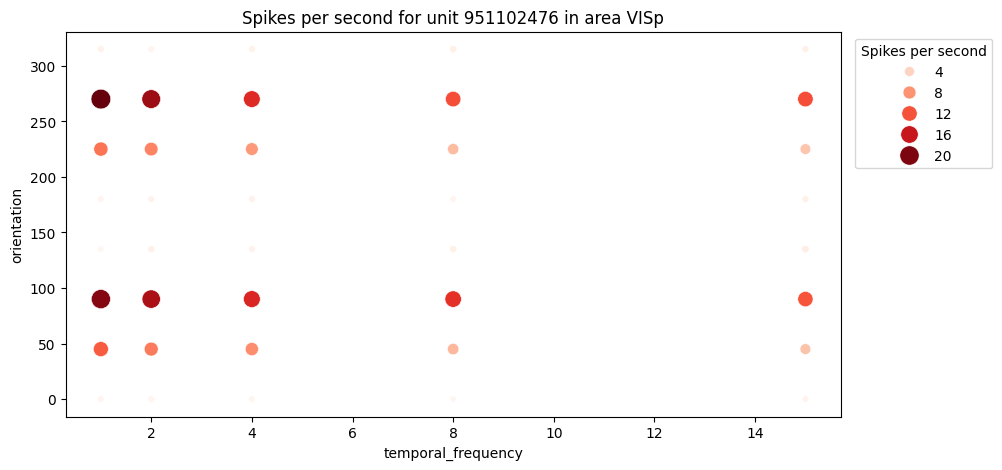

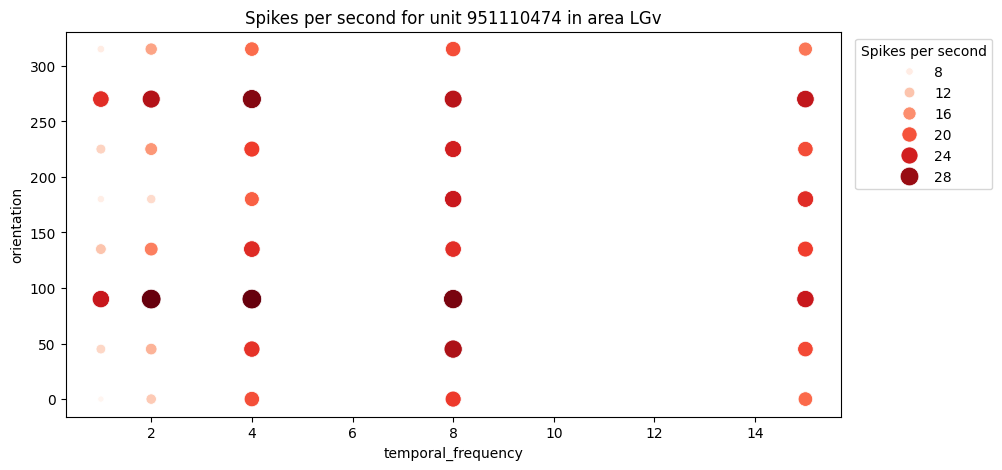

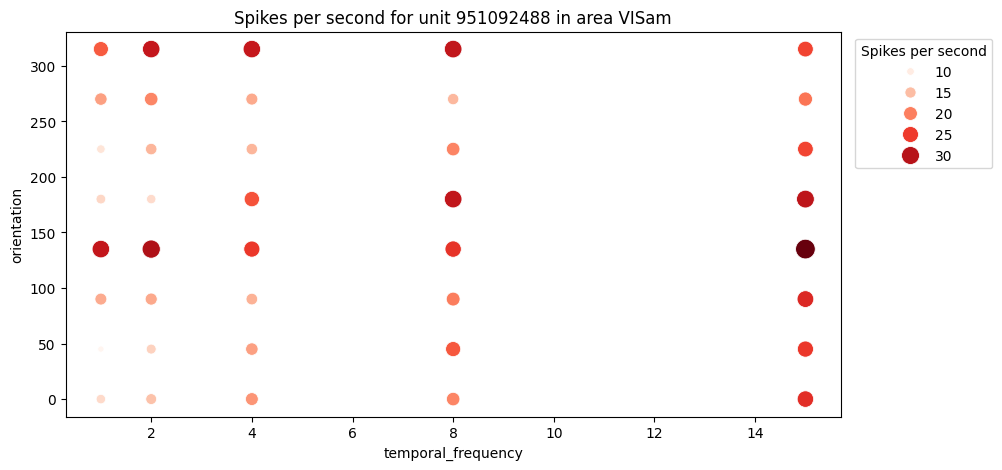

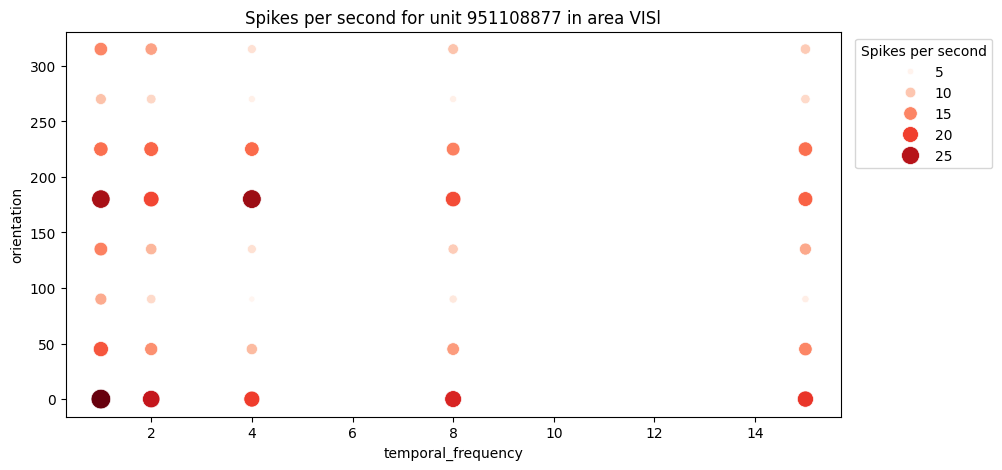

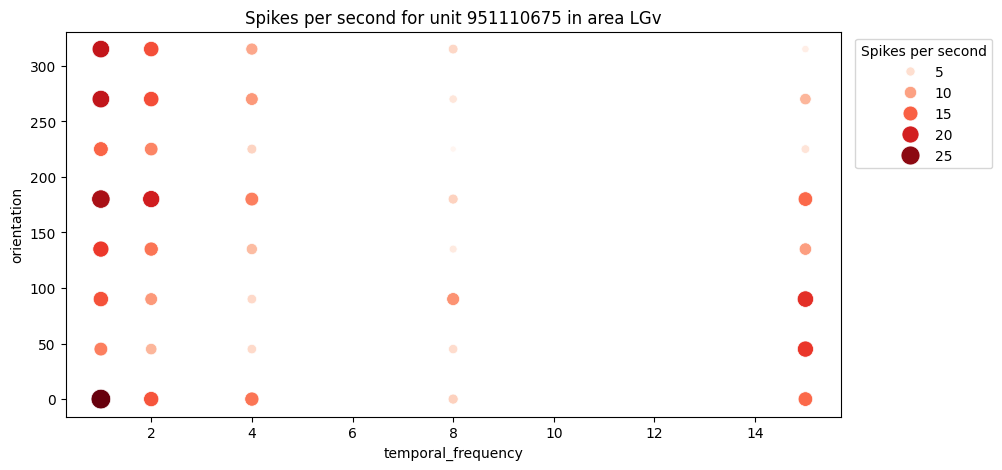

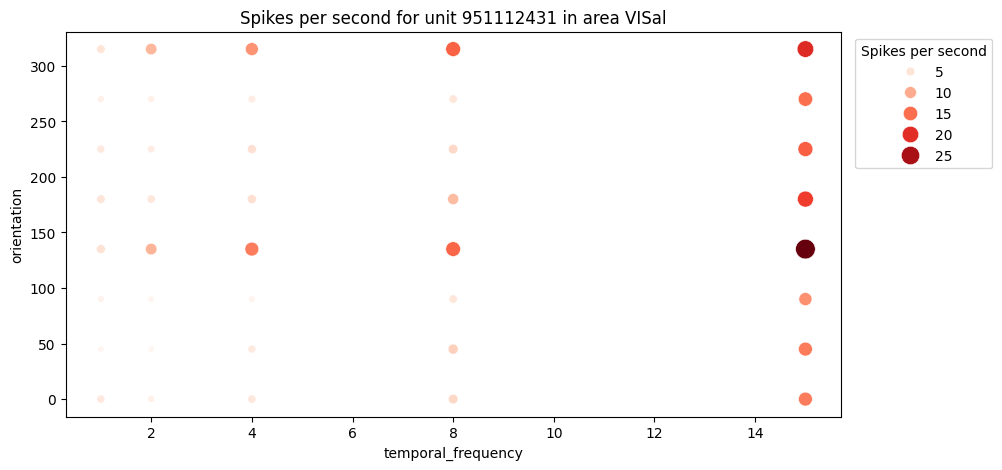

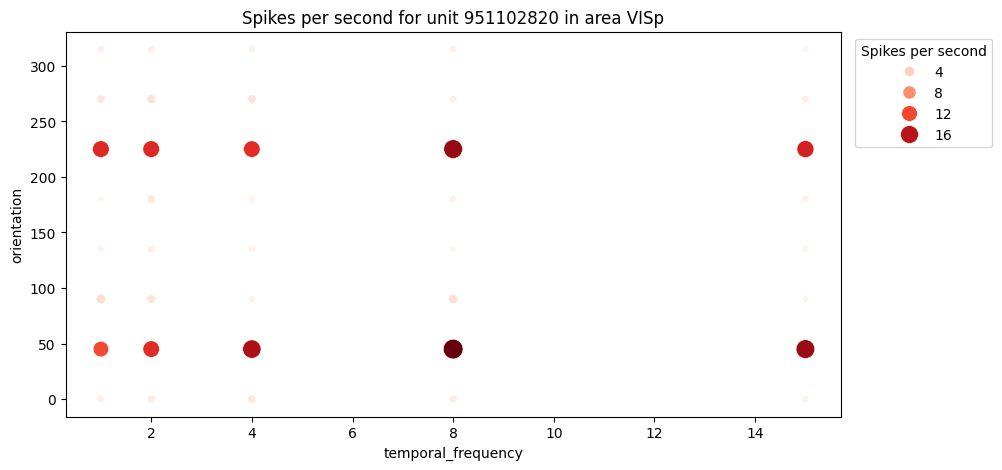

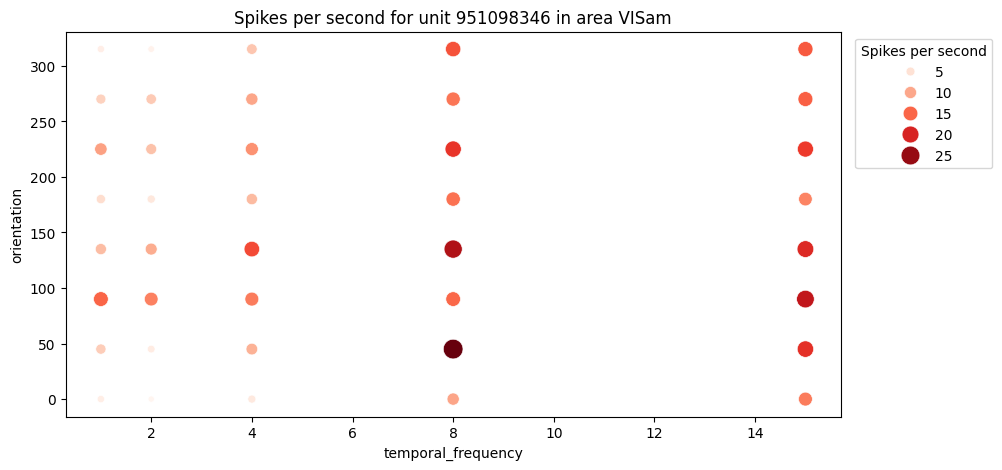

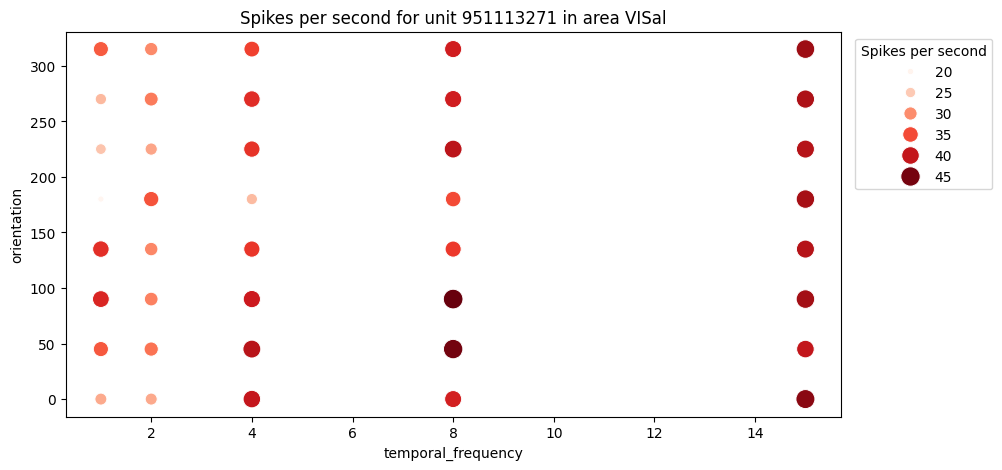

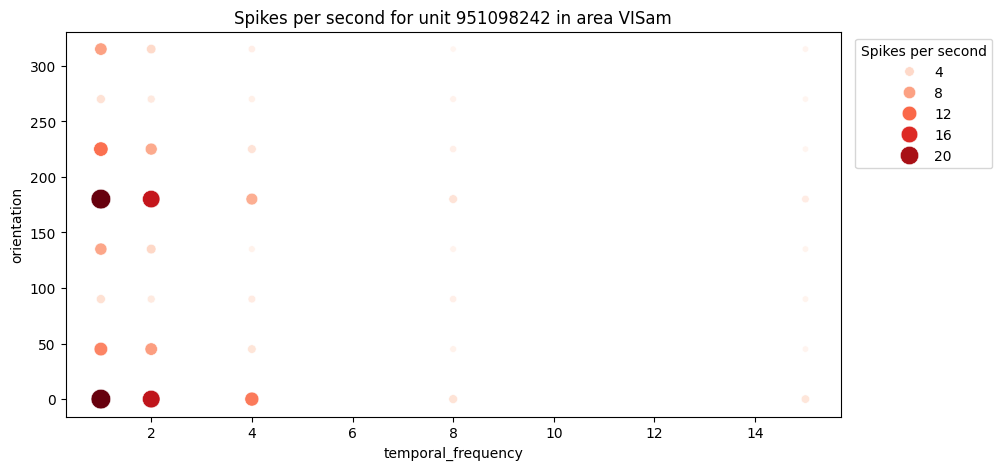

In [ ]:
for unit in top_5_percent_variances.keys():
    plot_unit_spikes_per_second(raw_dataset, unit, 'temporal_frequency')

## Static Gratings

In [11]:
raw_dataset = pd.read_parquet(f'ourdata/static_dataset_session_{session}.parquet')
raw_dataset

,stimulus_presentation_id,unit_id,orientation,spatial_frequency,spikes_per_second,area
0,49434,951088664,150.0,0.02,11.989965,APN
1,49434,951088679,150.0,0.02,7.993310,APN
2,49434,951088721,150.0,0.02,31.973239,APN
3,49434,951088823,150.0,0.02,3.996655,APN
4,49434,951088862,150.0,0.02,19.983275,APN
...,...,...,...,...,...,...
2660769,70389,951117252,0.0,0.16,3.996591,LP
2660770,70389,951117258,0.0,0.16,15.986363,LP
2660771,70389,951117264,0.0,0.16,7.993182,LP
2660772,70389,951117365,0.0,0.16,3.996591,CA1


In [12]:
analysed_dataset = pd.read_parquet(f'ourdata/analysed_static_dataset_session_{session}.parquet')
analysed_dataset

,stimulus_presentation_id,area,spatial_frequency,orientation,active
0,49434,APN,0.02,150.0,1
1,49434,CA1,0.02,150.0,1
2,49434,CA2,0.02,150.0,0
3,49434,CA3,0.02,150.0,1
4,49434,DG,0.02,150.0,1
...,...,...,...,...,...
103871,70389,VISal,0.16,0.0,1
103872,70389,VISam,0.16,0.0,1
103873,70389,VISl,0.16,0.0,1
103874,70389,VISp,0.16,0.0,1


In [13]:
# we compute the variance of the spikes per second for each unit
variances_drifting_units = compute_dataset_variance(raw_dataset, 'spatial_frequency')

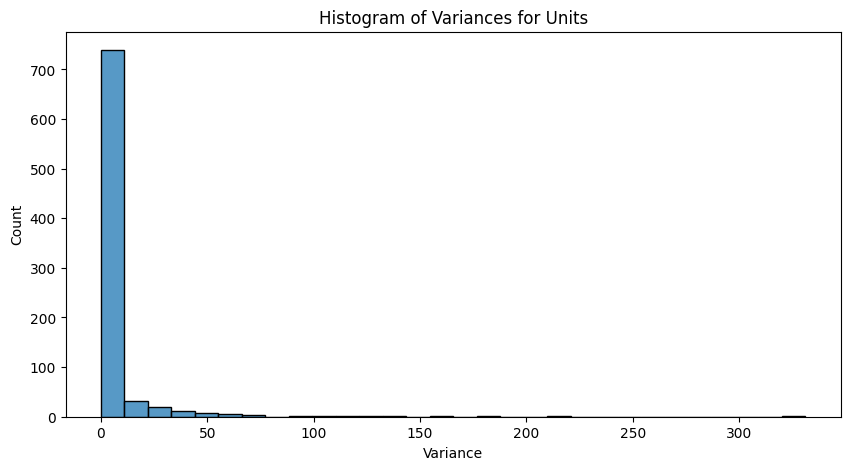

In [14]:
# we plot the histogram of the variances to see how they are distributed
histogram_variances(variances_drifting_units)

we see that most of the units have low variance. we are only interested in the units which have a higher variance so we keep only those:

In [15]:
# top 5% units with most variance
top_5_percent_variances = top_variances(variances_drifting_units, 0.05)

In [16]:
# we not create a dictionary with the areas of the top 5% units and their frequency
areas = get_area_frequency(raw_dataset, top_5_percent_variances.keys())
areas

{'LGv': 4,
 'VISal': 13,
 'VISl': 5,
 'VISp': 7,
 'NOT': 3,
 'MB': 1,
 'VISrl': 1,
 'VISam': 5,
 'LP': 1,
 'CA1': 1}

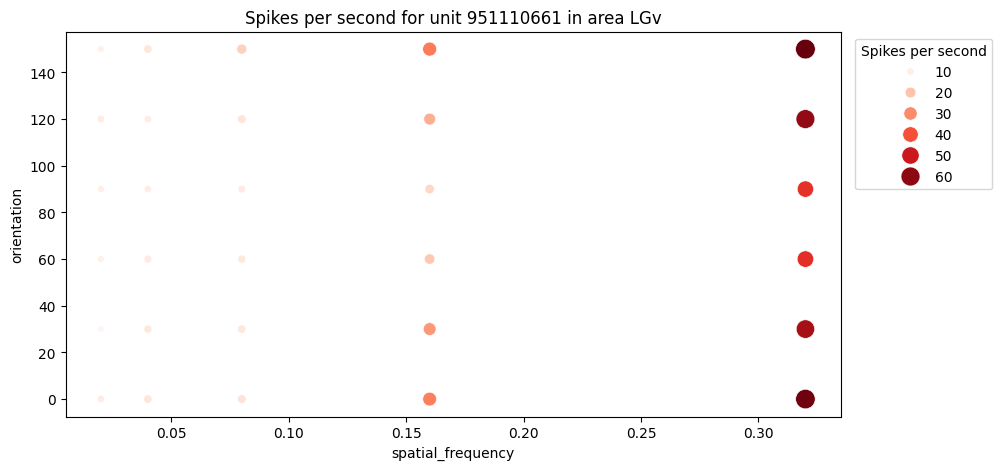

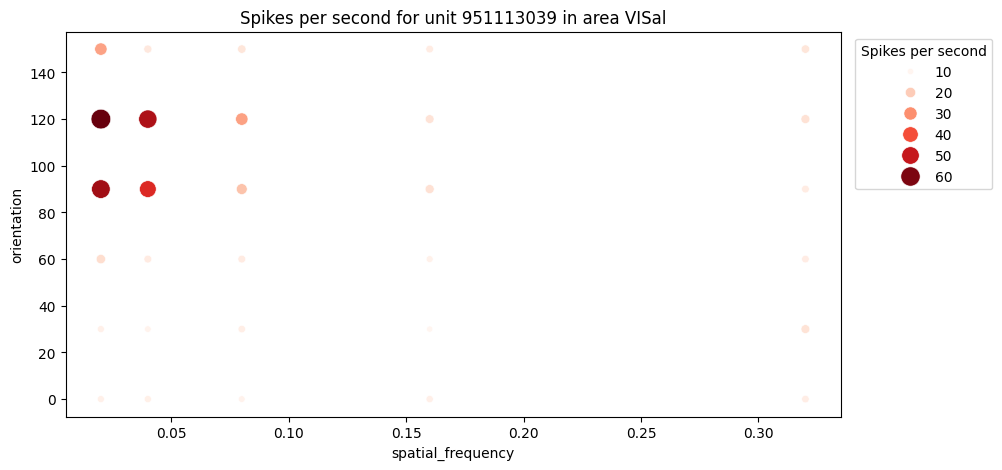

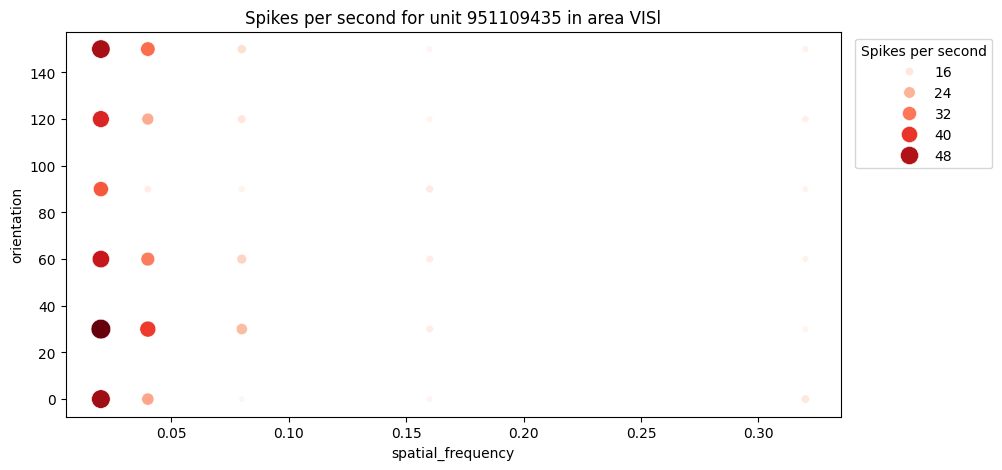

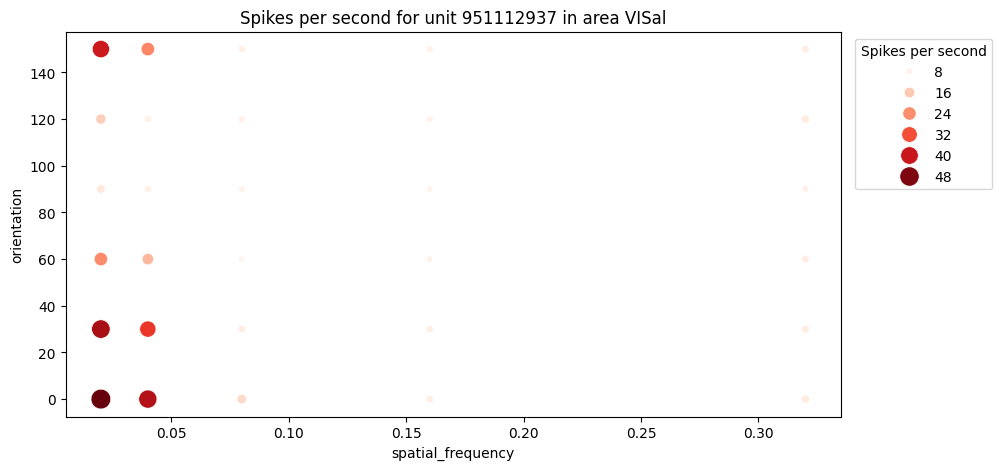

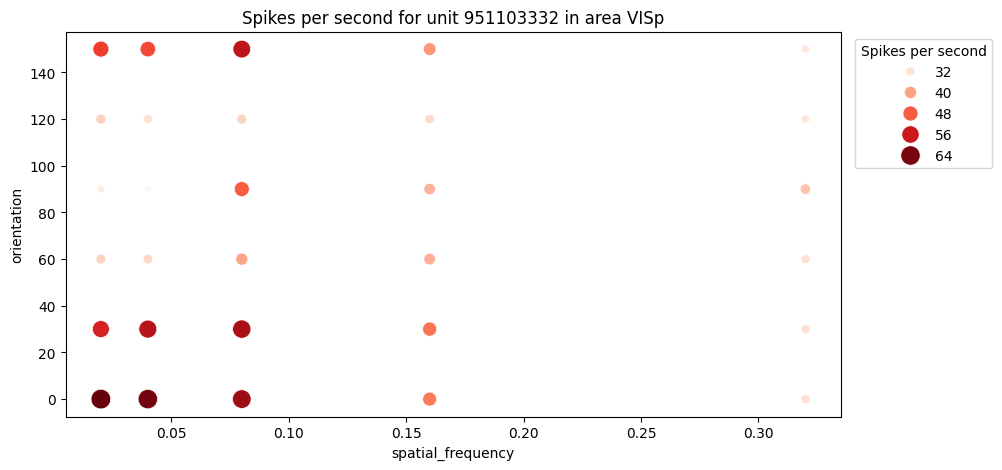

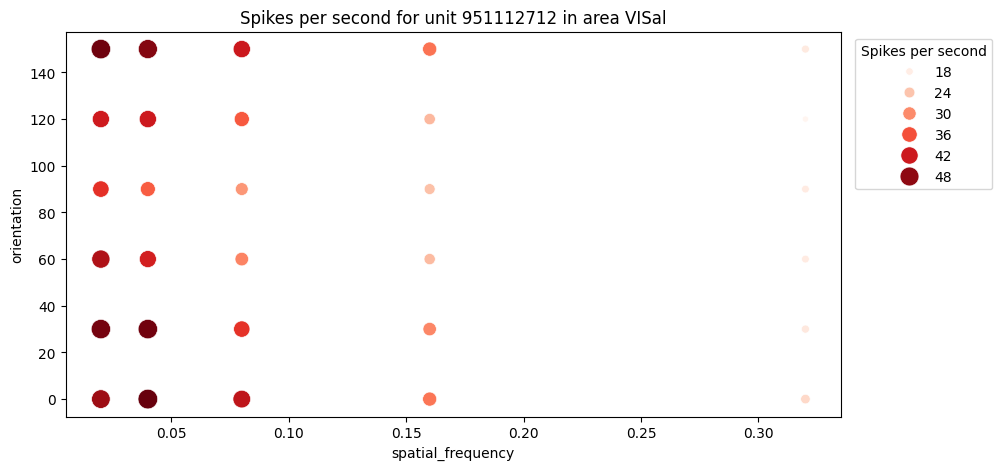

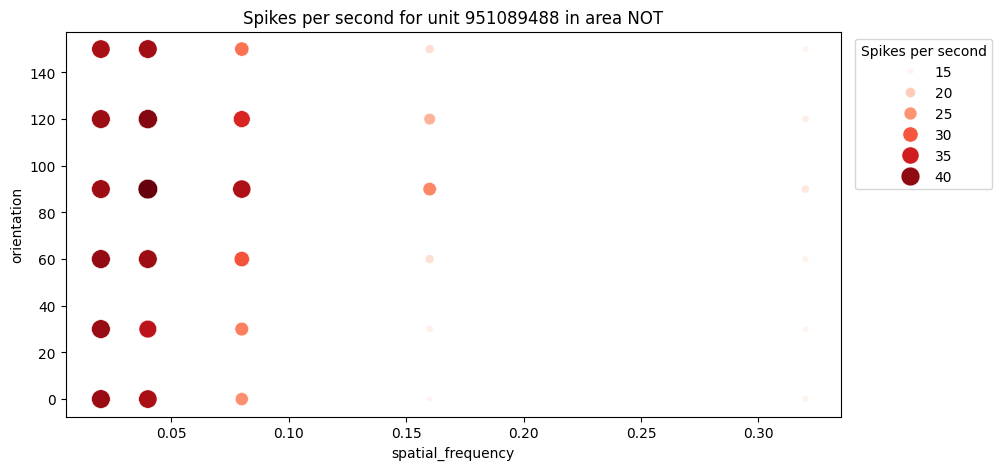

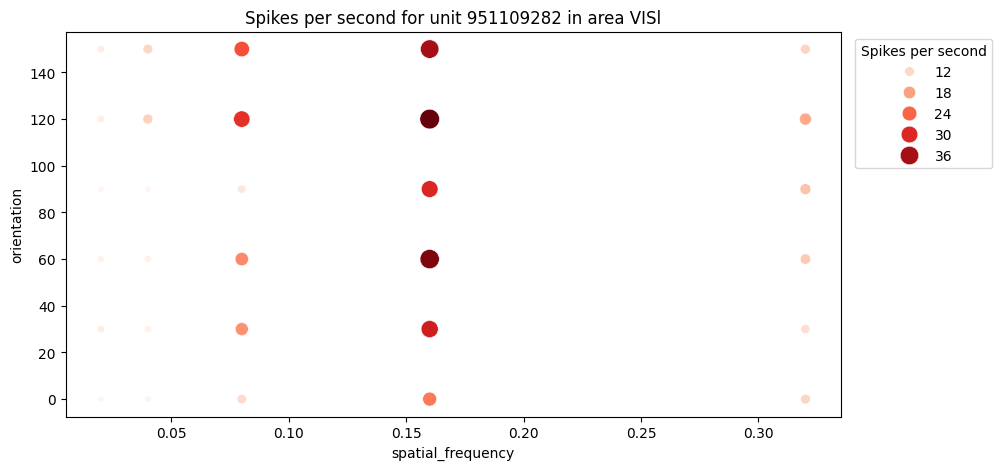

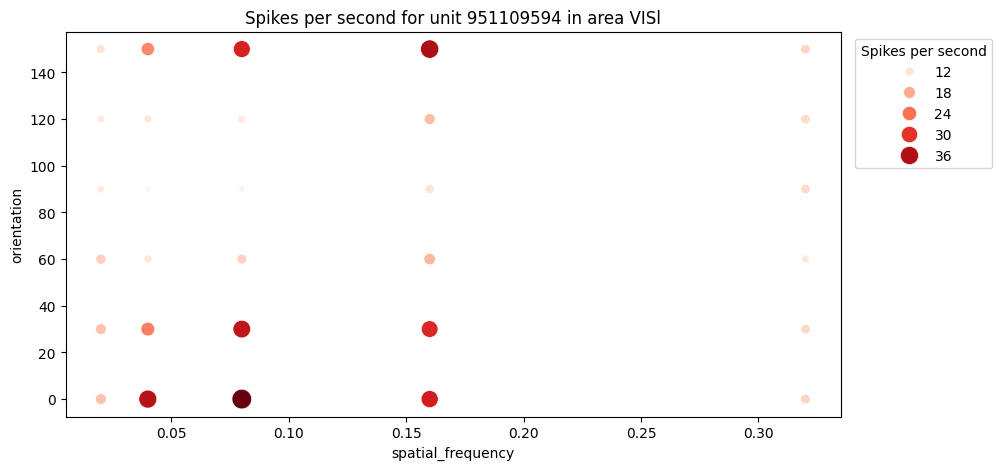

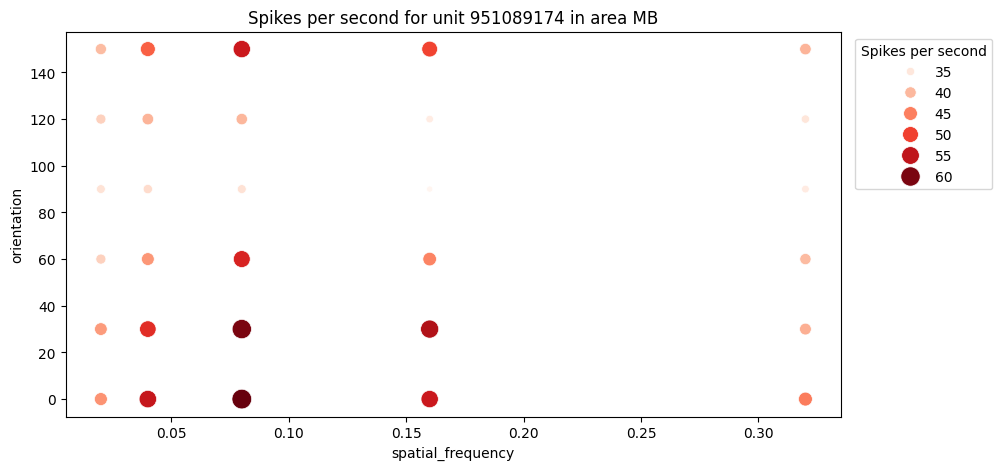

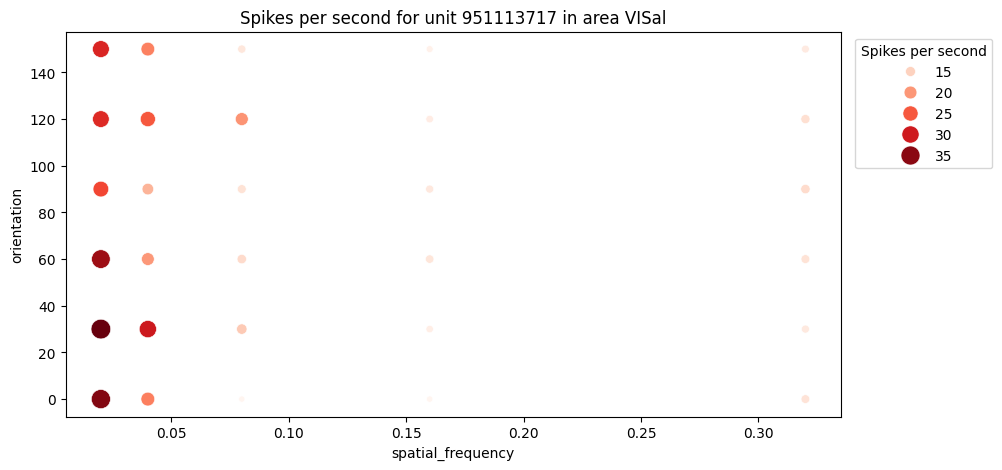

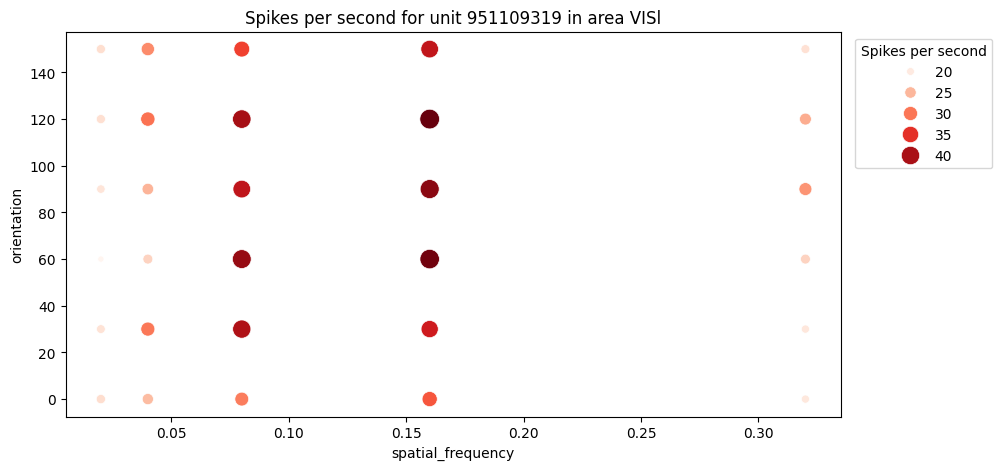

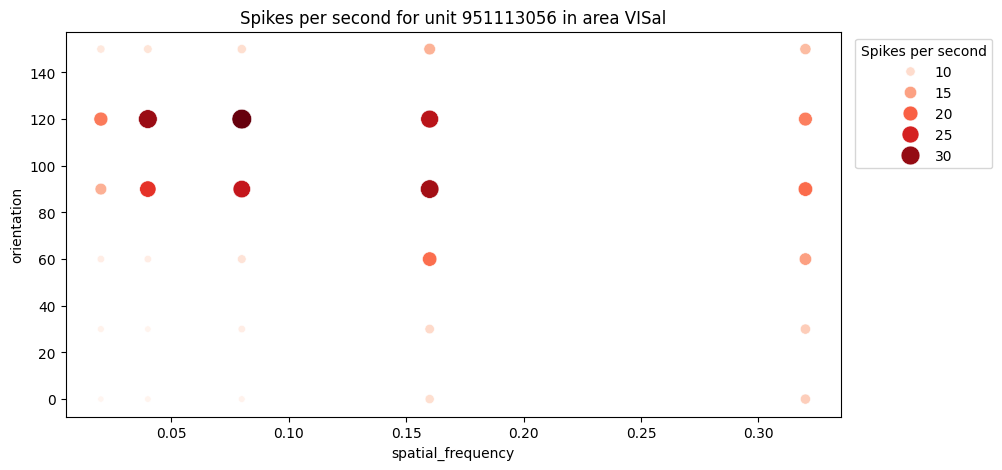

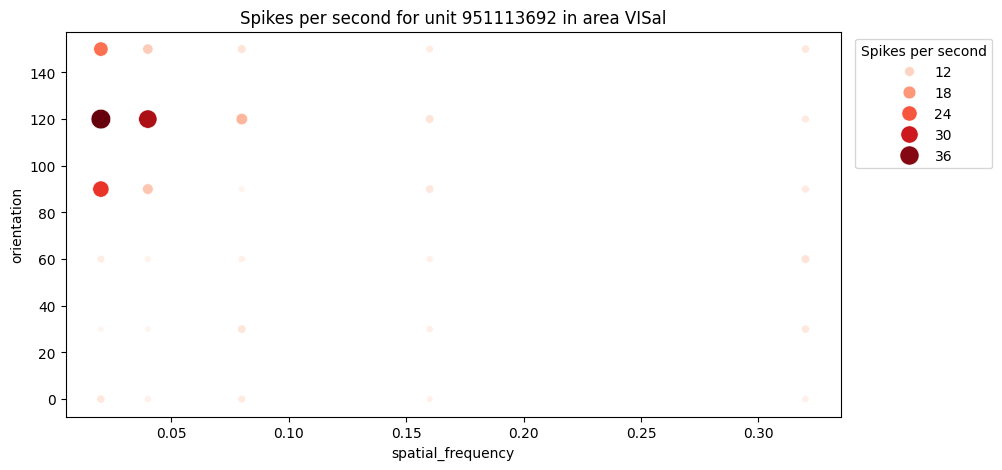

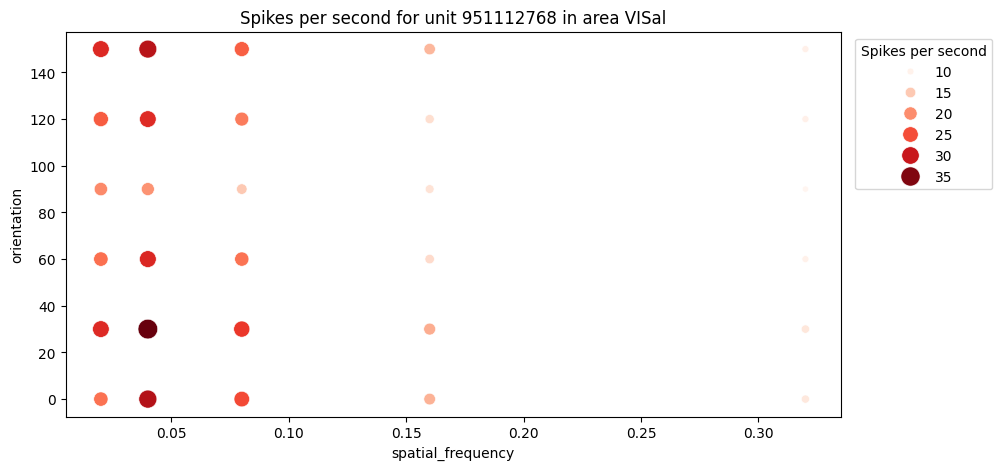

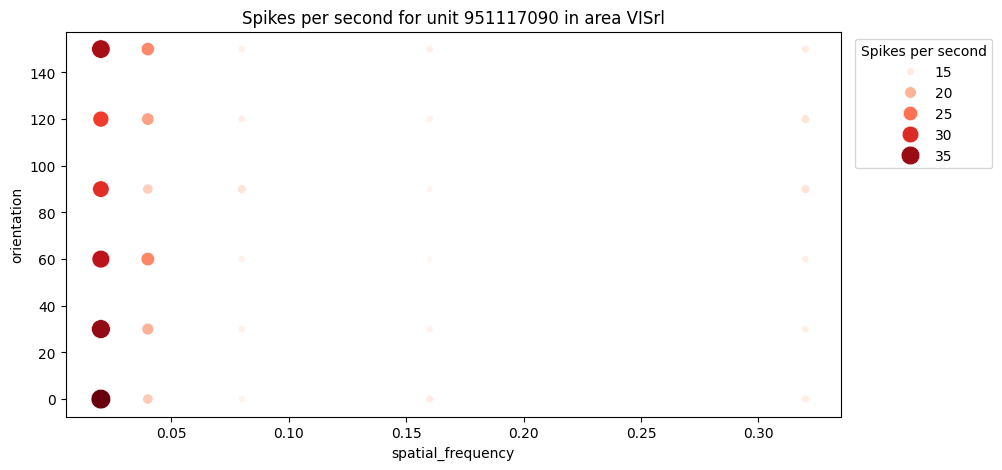

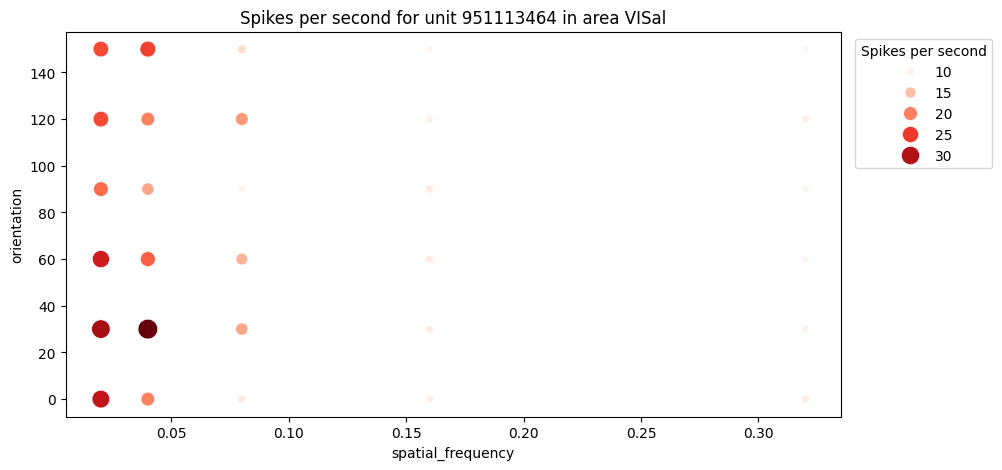

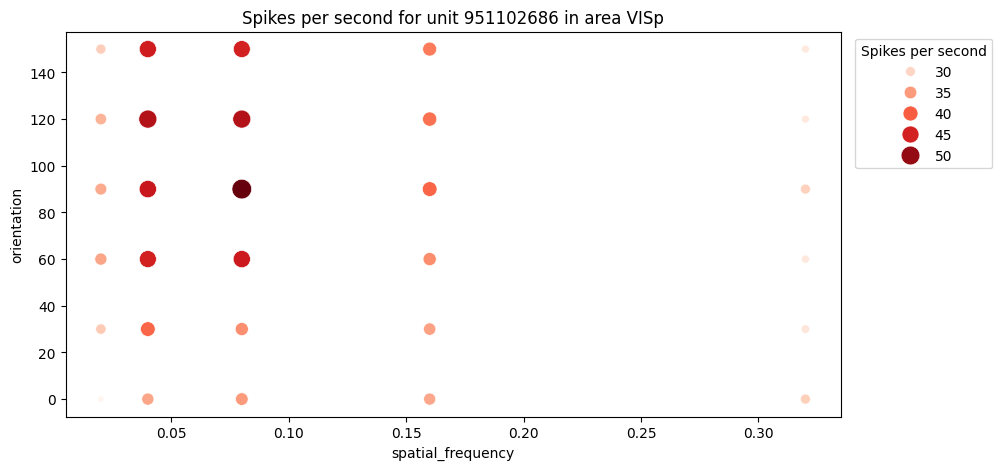

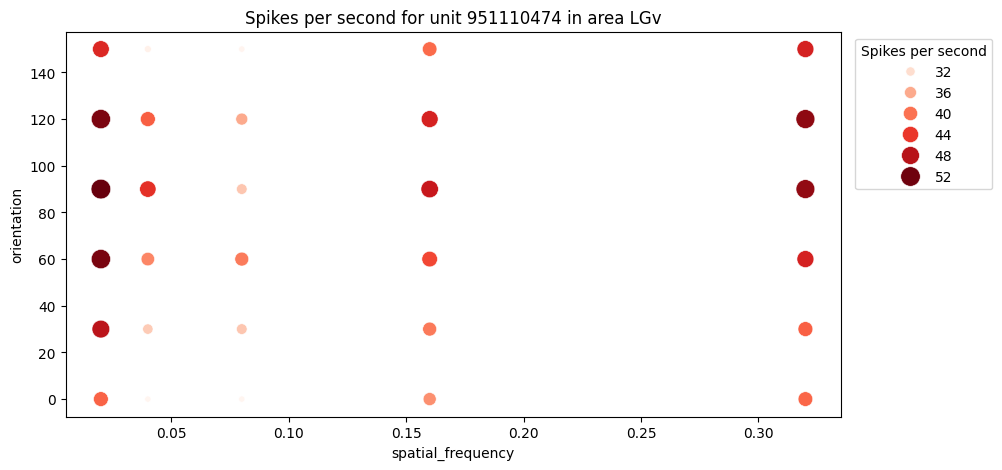

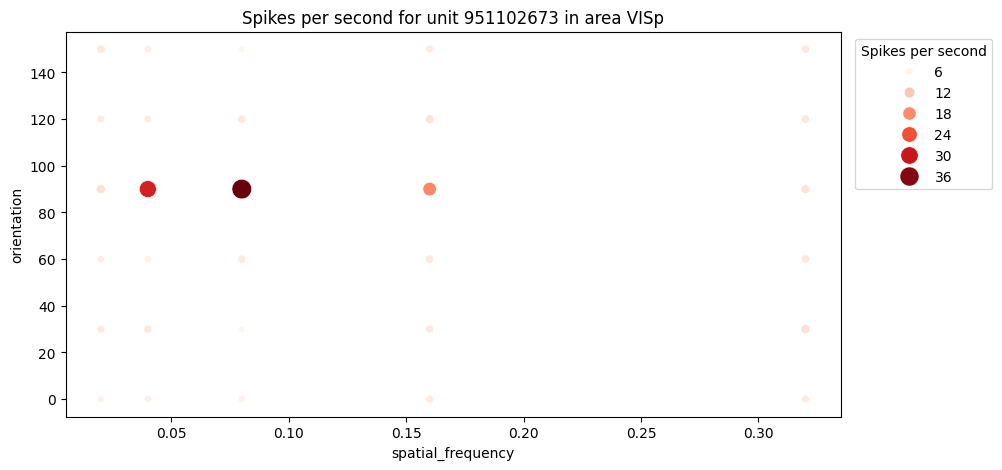

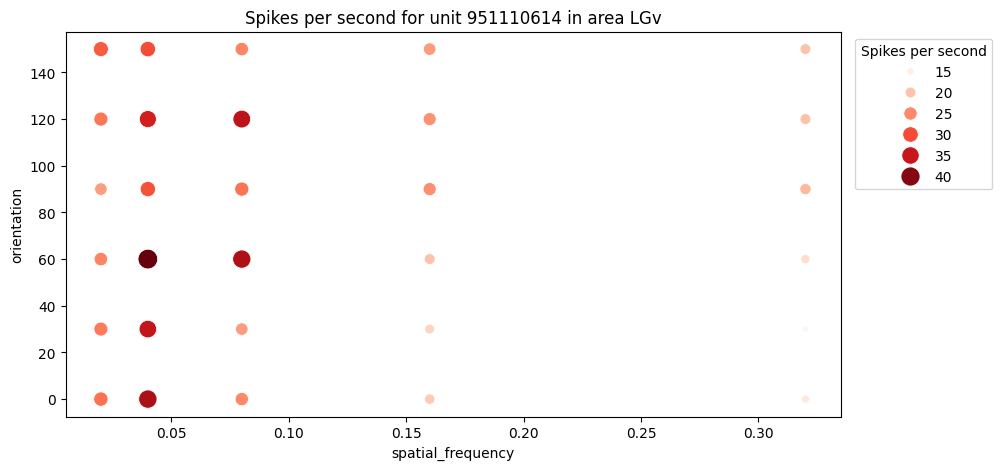

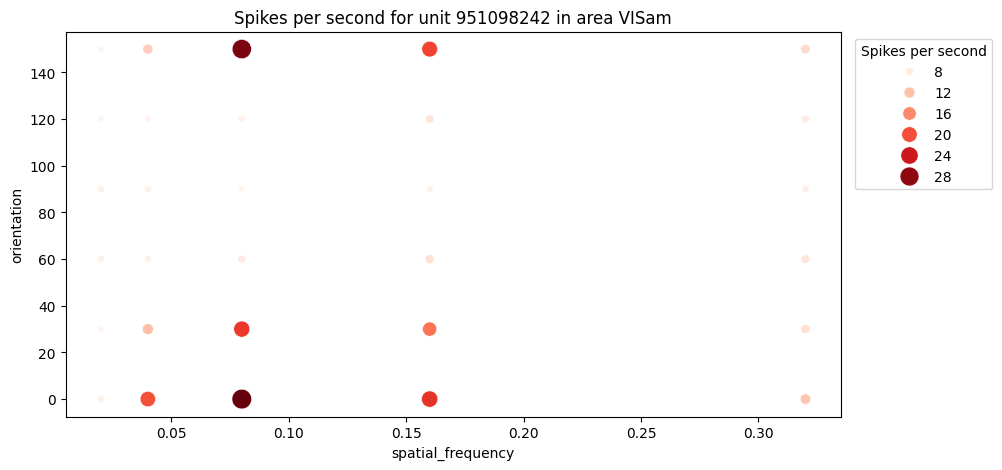

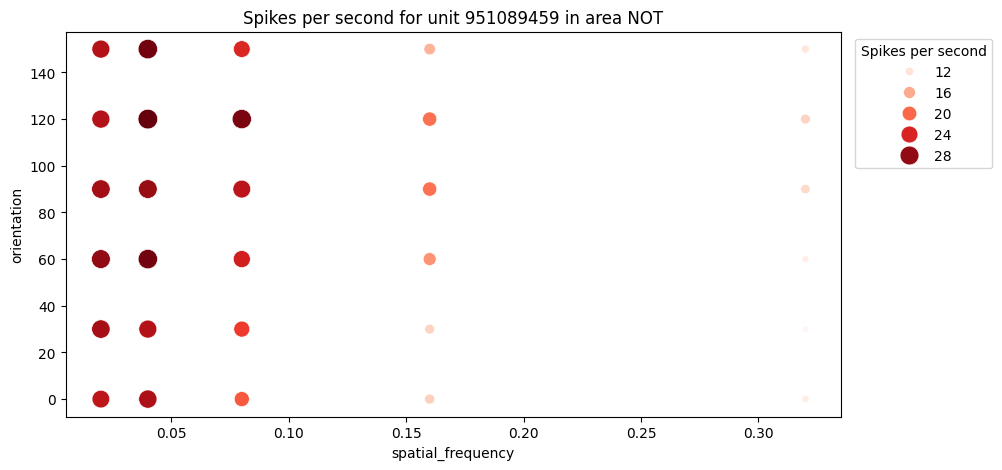

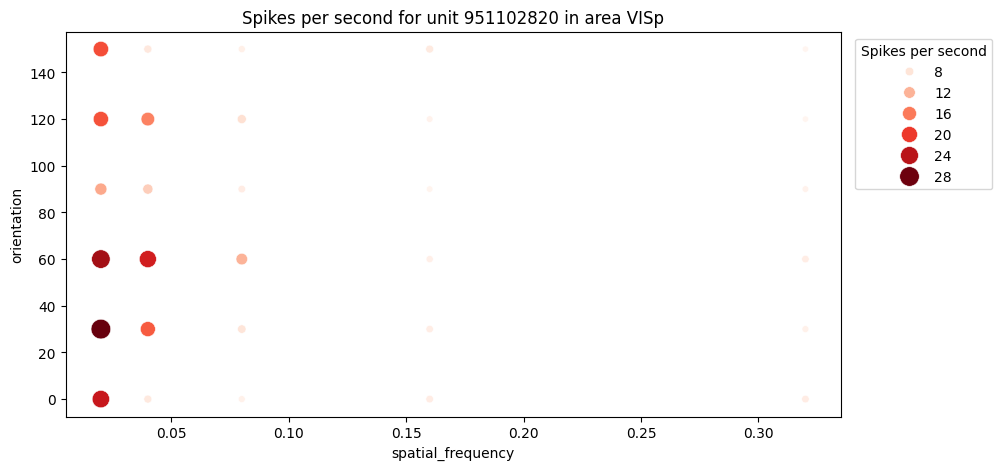

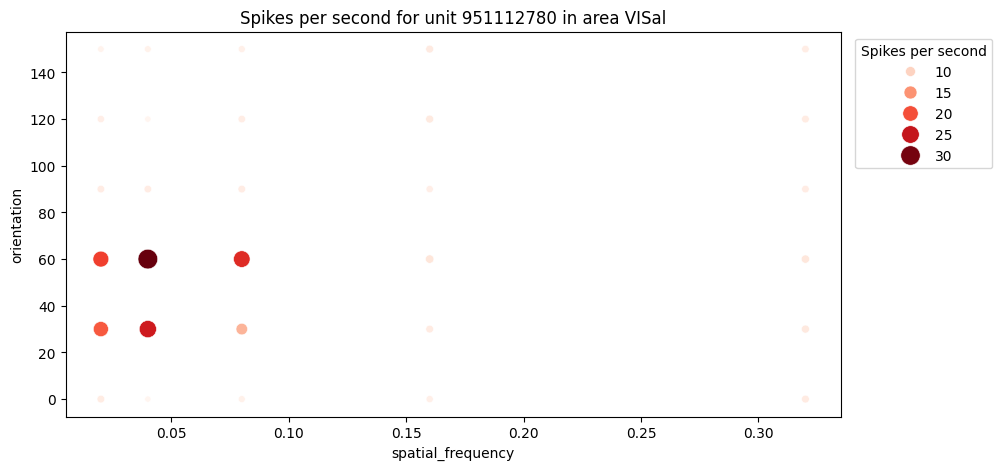

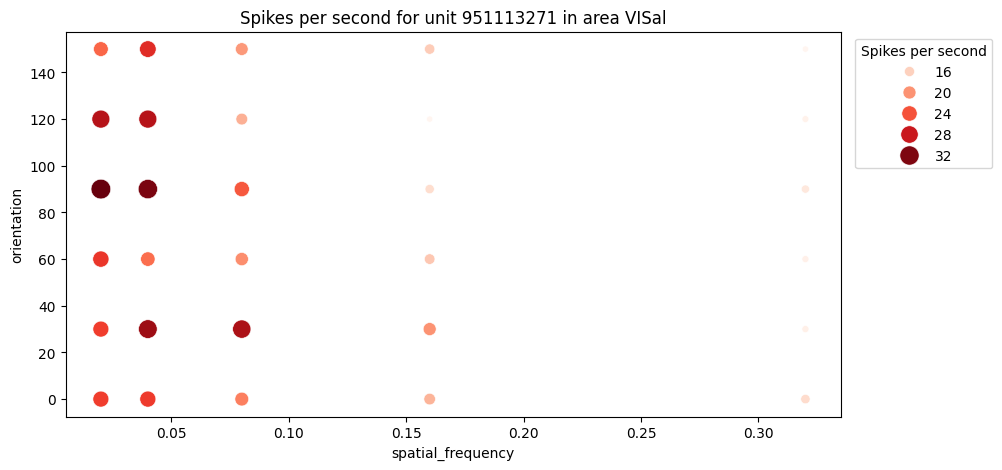

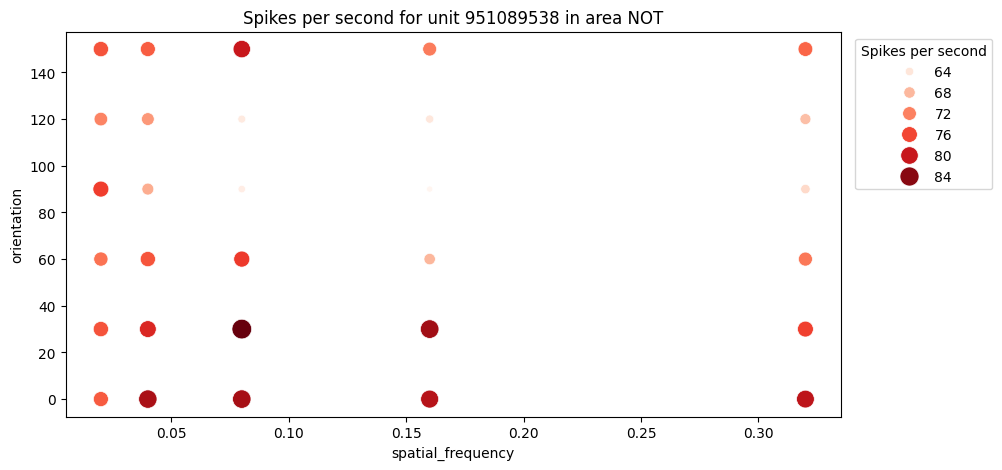

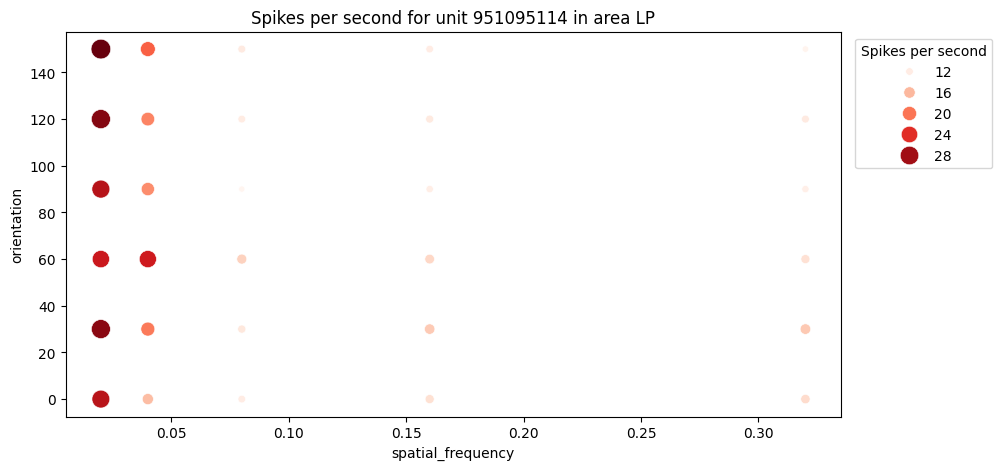

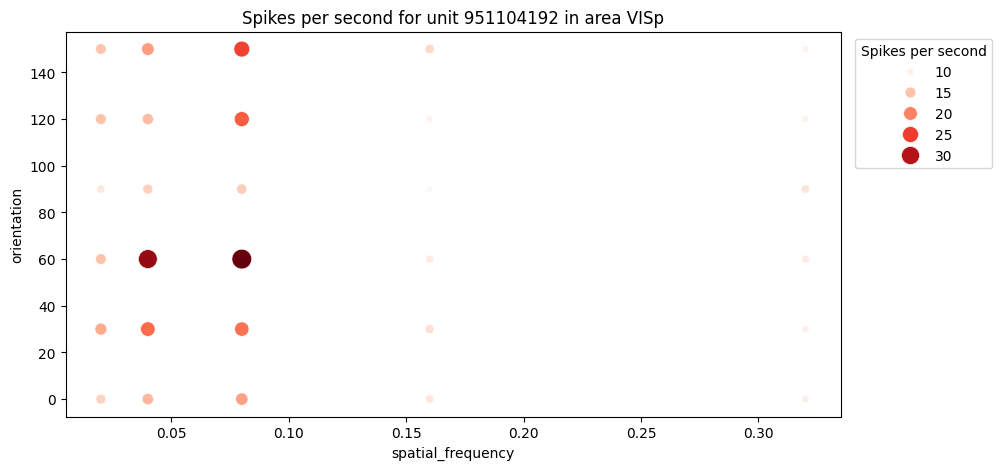

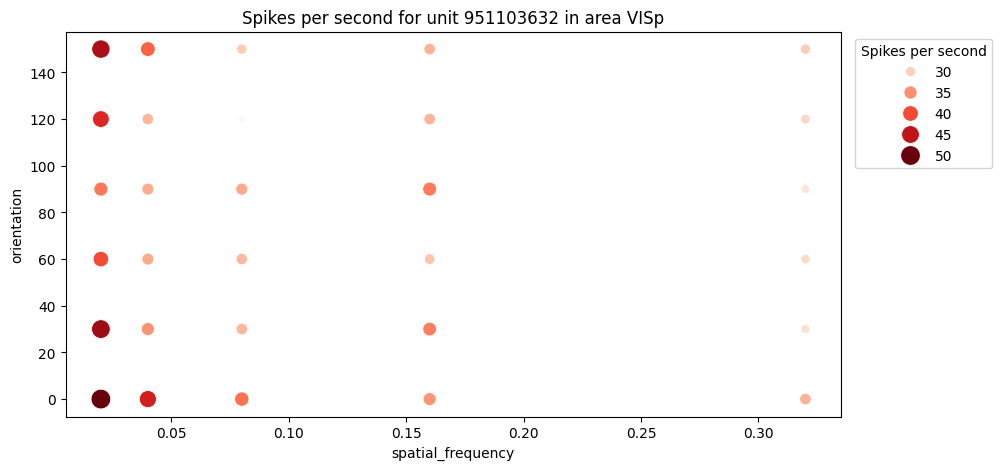

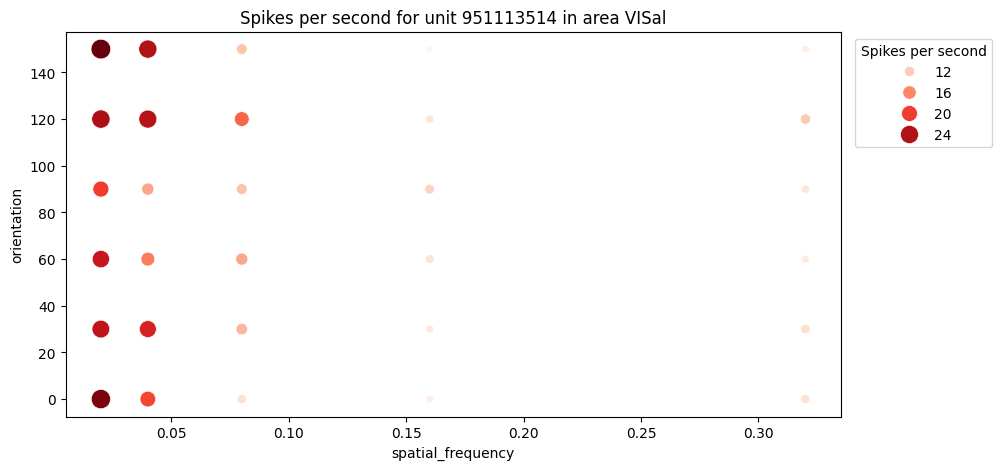

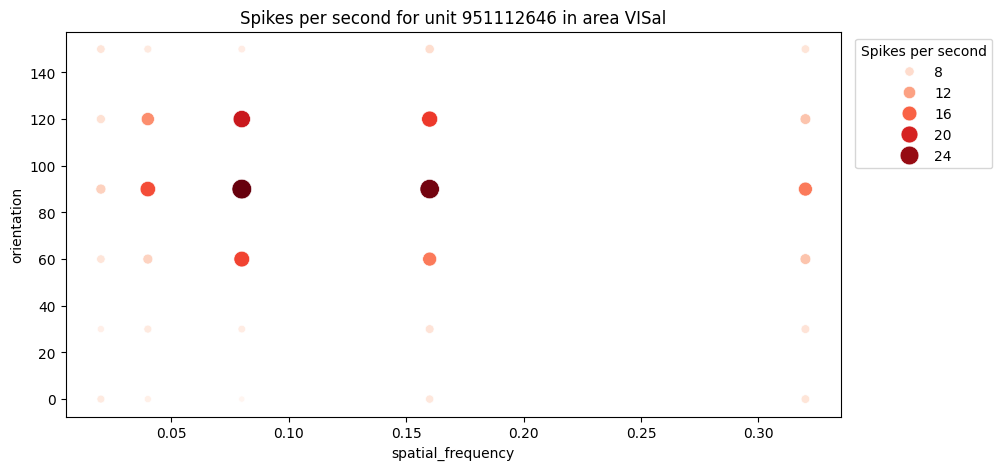

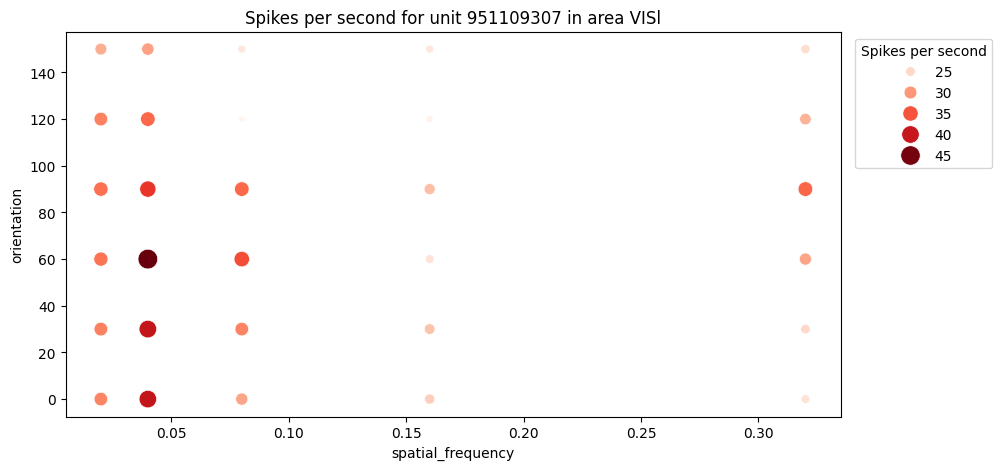

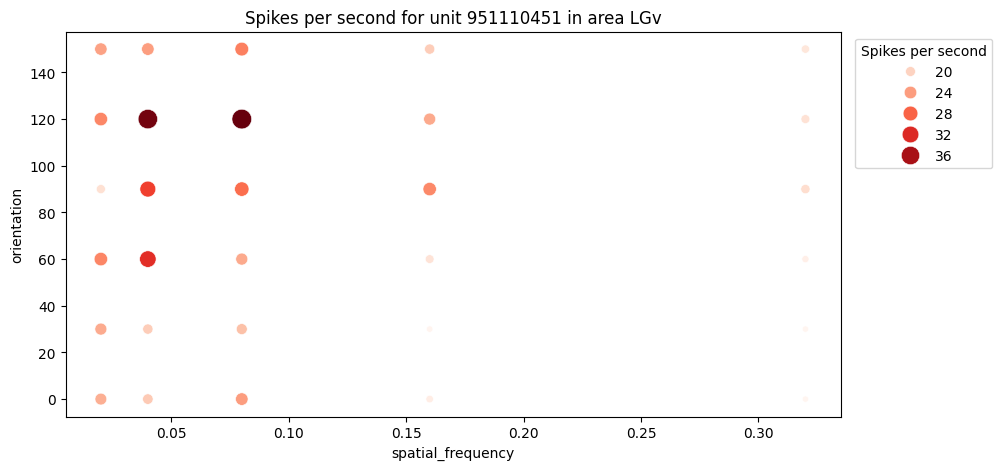

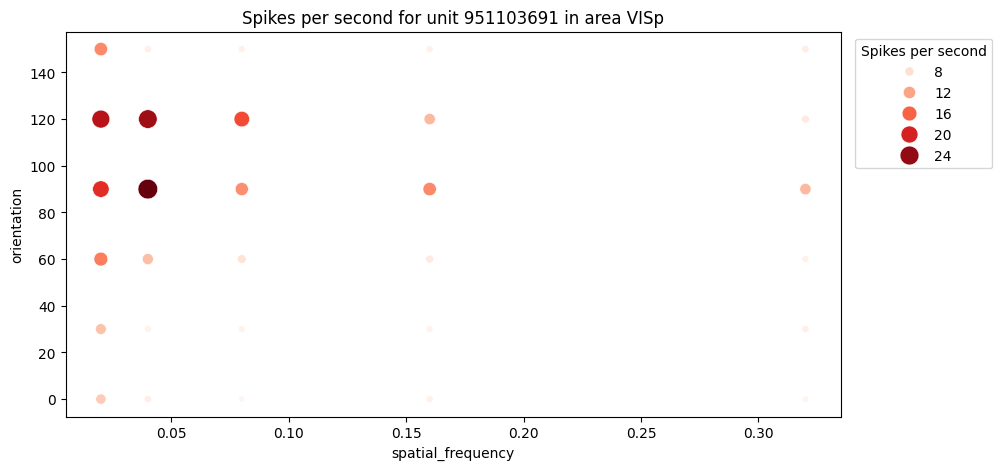

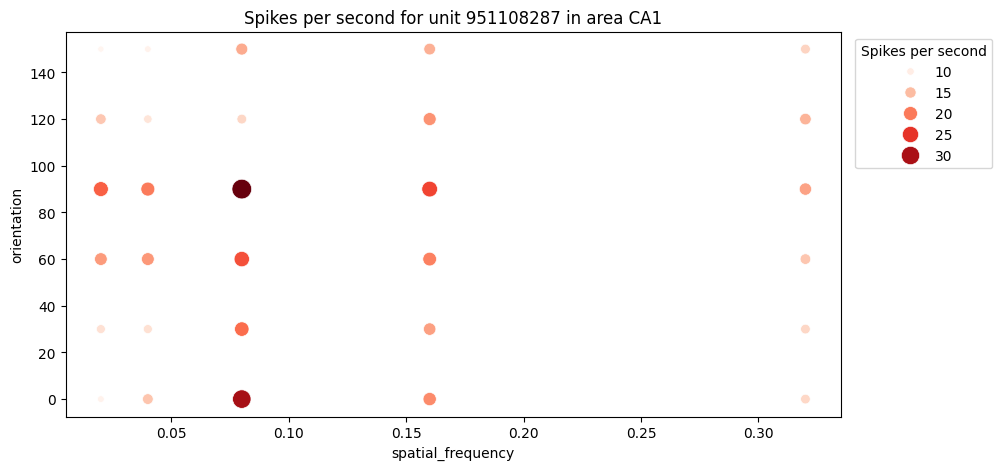

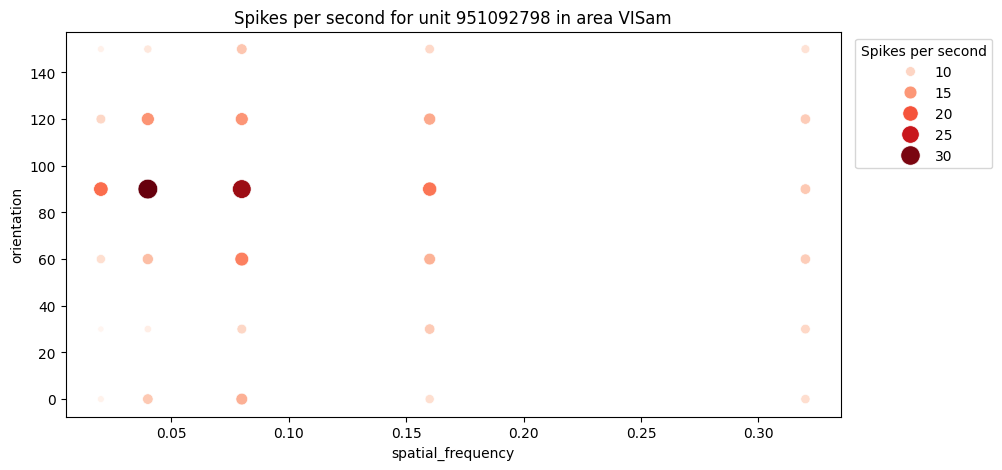

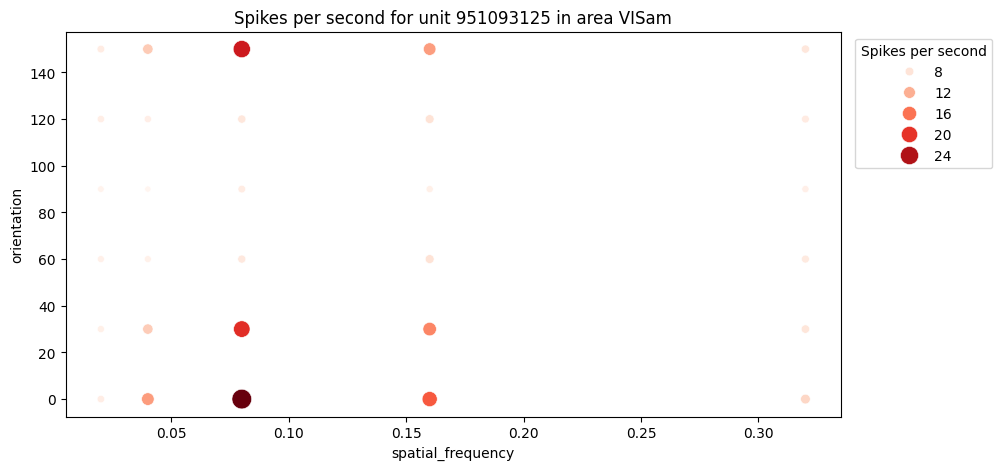

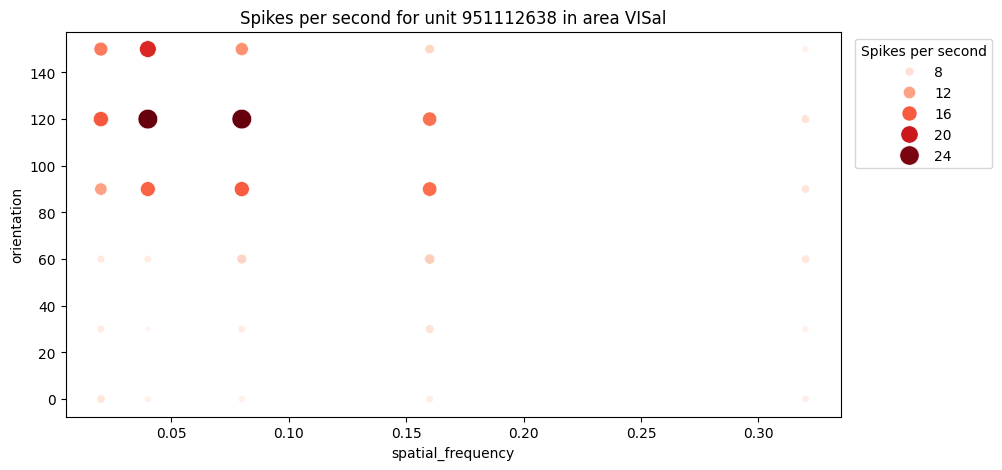

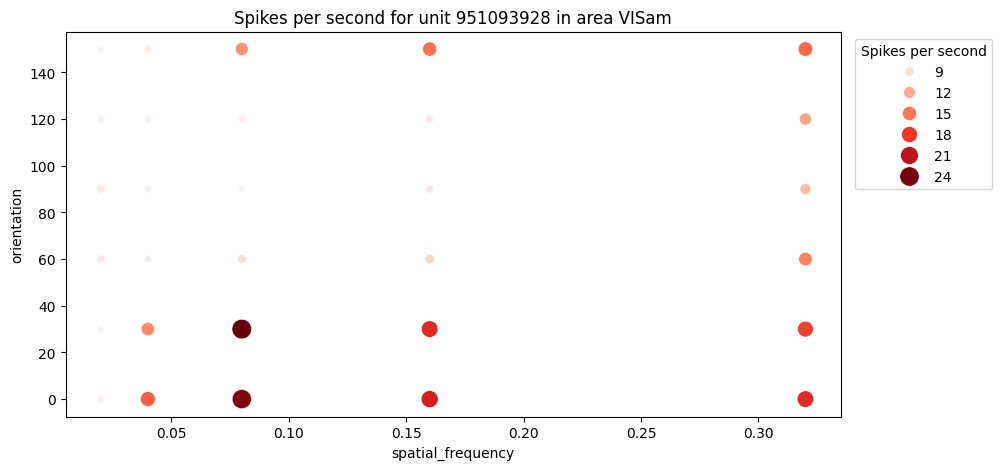

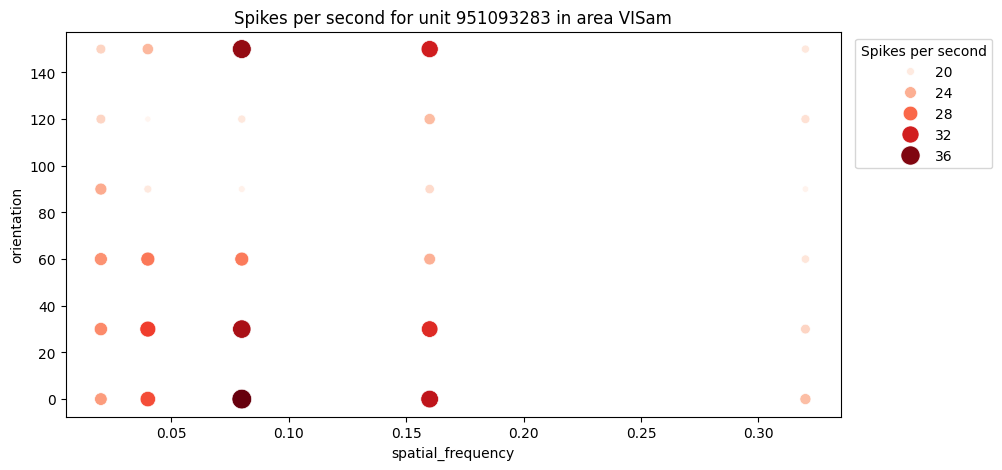

In [17]:
for unit in top_5_percent_variances.keys():
    plot_unit_spikes_per_second(raw_dataset, unit, 'spatial_frequency')